# FIFA 23 PROJECT

## Introduction

### READING, INFO, SHAPE

Starting dowloading all the necessary libraries for the project

In [4]:
import numpy as np
import pandas as pd
pd.set_option('display.max_column', None)
from datetime import datetime,timedelta
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import scipy.stats as stats
import plotly.graph_objs as go
import plotly.express as px
%matplotlib inline
from imblearn.under_sampling import TomekLinks
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import scipy.stats
from sklearn.decomposition import PCA
#from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from collections import Counter
from numpy import where
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
from collections import OrderedDict
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, Normalizer, FunctionTransformer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error
import uuid

We start by reading the dataset

In [112]:
#read dataset
pd.set_option("display.max_columns", None)
df = pd.read_csv("/Users/jesuspetit/Desktop/Ironhack_project/Fifa23_Data.csv")
df.head()

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Club Name,Wage(in Euro),Release Clause,Club Position,Contract Until,Club Jersey Number,Joined On,On Loan,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,National Team Name,National Team Image Link,National Team Position,National Team Jersey Number,Attacking Work Rate,Defensive Work Rate,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,Freekick Accuracy,LongPassing,BallControl,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeper Diving,Goalkeeper Handling,GoalkeeperKicking,Goalkeeper Positioning,Goalkeeper Reflexes,ST Rating,LW Rating,LF Rating,CF Rating,RF Rating,RW Rating,CAM Rating,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,169,67,2190,452,Paris Saint-Germain,195000,99900000,RW,2023,30,2021,-,Left,4,4,5,Argentina,https://cdn.sofifa.net/flags/ar.png,RW,10,Low,Low,81,89,90,94,34,64,84,90,70,91,88,95,93,93,90,93,87,76,91,92,95,86,68,70,68,91,44,40,93,94,75,96,20,35,24,6,11,15,14,8,90,90,91,91,91,90,91,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,185,81,2147,455,Real Madrid CF,450000,131199999,CF,2023,9,2009,-,Right,4,4,4,France,https://cdn.sofifa.net/flags/fr.png,ST,19,Medium,Medium,80,88,83,87,39,78,75,92,90,89,88,87,82,73,76,91,79,80,78,92,72,87,79,82,82,80,63,39,92,89,84,90,43,24,18,13,11,5,5,7,91,87,89,89,89,87,91,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,185,81,2205,458,FC Barcelona,420000,172200000,ST,2025,9,2022,-,Right,4,4,5,Poland,https://cdn.sofifa.net/flags/pl.png,ST,9,High,Medium,75,91,79,86,44,83,71,94,91,84,89,85,79,85,70,89,76,75,77,93,82,91,85,76,87,84,81,49,94,81,90,88,35,42,19,15,6,12,8,10,91,85,88,88,88,85,88,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,181,70,2303,483,Manchester City,350000,198900000,CM,2025,17,2015,-,Right,5,4,4,Belgium,https://cdn.sofifa.net/flags/be.png,RF,7,High,High,74,88,93,87,64,77,94,85,55,93,83,88,89,83,93,90,76,73,76,91,78,92,63,88,74,91,75,66,88,94,83,89,68,65,53,15,13,5,10,13,86,88,87,87,87,88,91,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,182,73,2177,470,Paris Saint-Germain,230000,366700000,ST,2024,7,2018,-,Right,4,5,4,France,https://cdn.sofifa.net/flags/fr.png,ST,10,High,Low,97,89,80,92,36,76,78,93,72,85,83,93,80,69,71,91,97,97,93,93,81,88,77,87,76,82,64,38,92,83,80,88,26,34,32,13,5,7,11,6,92,90,90,90,90,90,92,92,84,92,70,66,70,66,57,66,21


In [113]:
#arrange features

def standardize(col):
    return col.lower().replace(" ","_")
newcolumns=[]
for col in df.columns.to_list():
    newcolumns.append(standardize(col))
df.columns=newcolumns

In [114]:
df["id"] = [uuid.uuid1() for _ in range(len(df))]

In [115]:
df.drop(["known_as"], axis=1, inplace=True)
df.set_index(keys=["id"], inplace=True)

In [116]:
#dataset column info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18539 entries, 89744e48-992e-11ed-bf73-c65beec292cc to 8977398d-992e-11ed-bf73-c65beec292cc
Data columns (total 88 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   full_name                    18539 non-null  object
 1   overall                      18539 non-null  int64 
 2   potential                    18539 non-null  int64 
 3   value(in_euro)               18539 non-null  int64 
 4   positions_played             18539 non-null  object
 5   best_position                18539 non-null  object
 6   nationality                  18539 non-null  object
 7   image_link                   18539 non-null  object
 8   age                          18539 non-null  int64 
 9   height(in_cm)                18539 non-null  int64 
 10  weight(in_kg)                18539 non-null  int64 
 11  totalstats                   18539 non-null  int64 
 12  basestats                  

In [117]:
# drop not important columns.
df = df.drop(["full_name", "image_link", 'national_team_image_link', "national_team_jersey_number", "club_jersey_number"], axis=1)

In [118]:
POSITIONS_DICT = {}
GOALKEEPER_POSITIONS = []
DEFENSIVE_POSITIONS = []
MIDFIELDER_POSITIONS = []
ATTACKING_POSITIONS = []
for p in df["best_position"].unique():
    if "K" in p:
        GOALKEEPER_POSITIONS.append(p)
    elif "B" in p or "K" in p:
        DEFENSIVE_POSITIONS.append(p)
    elif "M" in p:
        MIDFIELDER_POSITIONS.append(p)
    else: 
        ATTACKING_POSITIONS.append(p)
POSITIONS_DICT["G"] = GOALKEEPER_POSITIONS
POSITIONS_DICT["D"] = DEFENSIVE_POSITIONS
POSITIONS_DICT["M"] = MIDFIELDER_POSITIONS
POSITIONS_DICT["A"] = ATTACKING_POSITIONS

In [119]:
def macro_positions(_p):
    for k, v in POSITIONS_DICT.items():
        if _p in v:
            return k

In [120]:
df["zone_position"] = df["best_position"].apply(macro_positions)

In [121]:
df.zone_position.value_counts()


M    7058
D    6273
A    3147
G    2061
Name: zone_position, dtype: int64

In [122]:
#Aggregating another feature
def qty_possible_positions(positions):
    positions = str(positions)
    p_list = positions.split(",")
    if type(p_list) == list:
        return len(p_list)


df["qty_positions_played"] = df["positions_played"].apply(qty_possible_positions)


In [123]:
df.qty_positions_played.value_counts()

1    9024
2    6710
3    2805
Name: qty_positions_played, dtype: int64

In [124]:
df.describe()

,overall,potential,value(in_euro),age,height(in_cm),weight(in_kg),totalstats,basestats,wage(in_euro),release_clause,joined_on,weak_foot_rating,skill_moves,international_reputation,pace_total,shooting_total,passing_total,dribbling_total,defending_total,physicality_total,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,longpassing,ballcontrol,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,goalkeeper_diving,goalkeeper_handling,_goalkeeperkicking,goalkeeper_positioning,goalkeeper_reflexes,st_rating,lw_rating,lf_rating,cf_rating,rf_rating,rw_rating,cam_rating,lm_rating,cm_rating,rm_rating,lwb_rating,cdm_rating,rwb_rating,lb_rating,cb_rating,rb_rating,gk_rating,qty_positions_played
count,18539.000000,18539.000000,1.853900e+04,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,1.853900e+04,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000
mean,65.852042,71.016668,2.875461e+06,25.240412,181.550839,75.173904,1602.114569,357.946221,8824.537462,5.081688e+06,2020.367442,2.946437,2.366147,1.086305,68.017746,53.777874,58.024327,63.109553,50.241383,64.775338,49.476833,46.255300,51.846755,59.072226,42.513944,55.898754,47.695129,43.006689,53.568423,58.516263,64.725336,64.838341,63.518906,61.542586,64.059550,57.827661,64.795566,63.040455,65.152004,46.825719,55.668537,46.853282,50.520362,54.191542,47.994444,58.036625,46.747505,48.399159,46.264146,16.402125,16.157182,16.061007,16.205944,16.472895,56.725929,55.819138,55.714925,55.714925,55.714925,55.819138,57.950267,58.451319,57.374076,58.451319,56.281569,55.928583,56.281569,55.650251,54.528184,55.650251,23.257134,1.664545
std,6.788353,6.192866,7.635129e+06,4.718163,6.858097,7.013593,273.160237,39.628259,19460.531154,1.467203e+07,2.056372,0.673778,0.772428,0.358753,10.649511,13.619867,9.717950,9.336566,16.392532,9.577715,17.887405,19.623881,17.318947,14.287698,17.635249,18.751691,17.910205,16.997758,14.633838,16.590051,15.280849,15.108259,14.905330,8.900297,14.483193,12.949870,12.293523,16.269330,12.622774,19.362064,16.905505,20.666647,19.660034,13.478006,15.730026,12.036272,20.350228,21.191644,20.701146,17.589457,16.924266,16.680839,17.089109,17.927602,13.475267,14.632018,14.216500,14.216500,14.216500,14.632018,13.905442,13.987122,13.171194,13.987122,13.903836,13.872190,13.903836,14.159466,14.743929,14.159466,15.108925,0.724954
min,47.000000,48.000000,0.000000e+00,16.000000,155.000000,49.000000,759.000000,224.000000,0.000000,0.000000e+00,2002.000000,1.000000,1.000000,1.000000,28.000000,16.000000,25.000000,28.000000,15.000000,30.000000,6.000000,3.000000,5.000000,10.000000,3.000000,3.000000,6.000000,4.000000,9.000000,5.000000,14.000000,15.000000,18.000000,30.000000,20.000000,18.000000,22.000000,14.000000,25.000000,4.000000,10.000000,3.000000,2.000000,10.000000,6.000000,13.000000,3.000000,6.000000,6.000000,2.000000,2.000000,2.000000,2.000000,2.000000,19.000000,14.000000,15.000000,15.000000,15.000000,14.000000,17.000000,18.000000,18.000000,18.000000,17.000000,19.000000,17.000000,17.000000,18.000000,17.000000,10.000000,1.000000
25%,62.0000

In [125]:
df.isna().sum()

overall                 0
potential               0
value(in_euro)          0
positions_played        0
best_position           0
                       ..
cb_rating               0
rb_rating               0
gk_rating               0
zone_position           0
qty_positions_played    0
Length: 85, dtype: int64

In [126]:
df.columns[df.isna().any()]

Index([], dtype='object')

In [127]:
df.shape

(18539, 85)

### CREATING CATEGORICALS


In [128]:
categorical_df = df.select_dtypes(include = np.object)

In [129]:
#attacking_work_rate status
df.attacking_work_rate.value_counts()

Medium    12204
High       5462
Low         873
Name: attacking_work_rate, dtype: int64

In [130]:
#defensive_work_rate status
df.defensive_work_rate.value_counts()


Medium    13613
High       3377
Low        1549
Name: defensive_work_rate, dtype: int64

### CREATING NUMERICALS

In [131]:
numerical_df = df.select_dtypes(include = np.number)

In [132]:
df.best_position.unique()

array(['CAM', 'CF', 'ST', 'CM', 'RW', 'GK', 'CB', 'LW', 'CDM', 'LM', 'LB',
       'RM', 'RB', 'LWB', 'RWB'], dtype=object)

## outliers 

In [133]:
# Checking Outliers
sns.set(style = 'darkgrid', rc = {'figure.figsize':(10,6)}, font_scale = 1.5)
#for col in numerical_df.columns:
    #sns.boxplot(y = numerical_df[col])
    #plt.show()

In [134]:
# Checking distribution of variables
sns.set(style = 'darkgrid', rc = {'figure.figsize':(20,10)}, font_scale = 1.5)
#for col in numerical_df.columns:
    #sns.displot(x = numerical_df[col], kde = True)
    #plt.show()

### Categorical Charts

In [135]:
def pie_count(data, field="nationality", percent_limit=0.5, title="Number of players by "):
    
    title += field
    #data[field] = data[field].fillna('NA')
    data = data[field].value_counts().to_frame()

    total = data[field].sum()
    data['percentage'] = 100 * data[field]/total    

    percent_limit = percent_limit
    otherdata = data[data['percentage'] < percent_limit] 
    others = otherdata['percentage'].sum()  
    maindata = data[data['percentage'] >= percent_limit]
    
    data = maindata
    other_label = "Others(<" + str(percent_limit) + "% each)"       
    data.loc[other_label] = pd.Series({field:otherdata[field].sum()}) 
    
    labels = data.index.tolist()   
    datavals = data[field].tolist()
    
    trace = go.Pie(labels = labels,
                values = datavals)

    layout = go.Layout(
        title = title,
        height=700
        )
    
    fig = go.Figure(data=[trace], layout=layout)
    #fig.show()
    
#pie_count(df, 'nationality')
#pie_count(df, 'national_team_name')
#pie_count(df, 'club_name')
#pie_count(df, 'contract_until')
#pie_count(df, 'best_position', 0.1)
#pie_count(df, 'club_position', 0.1)
#pie_count(df, 'national_team_position', 0.1)
#pie_count(df, 'preferred_foot')
#pie_count(df, 'on_loan')
#pie_count(df, 'attacking_work_rate', 0.1)
#pie_count(df, 'defensive_work_rate')
#pie_count(df, 'zone_position')


In [136]:
df_free_agents = df[df["contract_until"] == "-"]

In [137]:
df_free_agents.head(5).T

id,897460f4-992e-11ed-bf73-c65beec292cc,89746144-992e-11ed-bf73-c65beec292cc,897464c8-992e-11ed-bf73-c65beec292cc,89746ef0-992e-11ed-bf73-c65beec292cc,8974701c-992e-11ed-bf73-c65beec292cc
overall,80,80,79,78,77
potential,80,80,79,78,77
value(in_euro),0,0,0,0,0
positions_played,GK,GK,GK,CB,GK
best_position,GK,GK,GK,CB,GK
...,...,...,...,...,...
cb_rating,33,30,34,78,37
rb_rating,30,30,32,74,33
gk_rating,80,80,79,20,77
zone_position,G,G,G,D,G


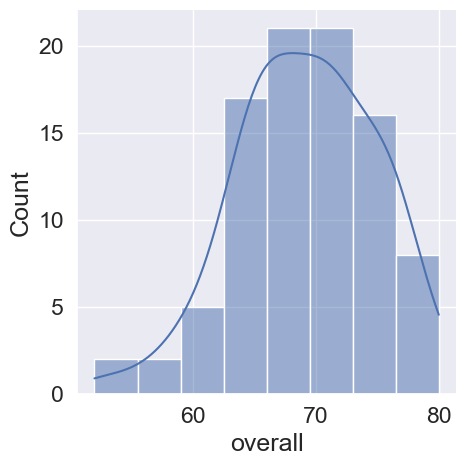

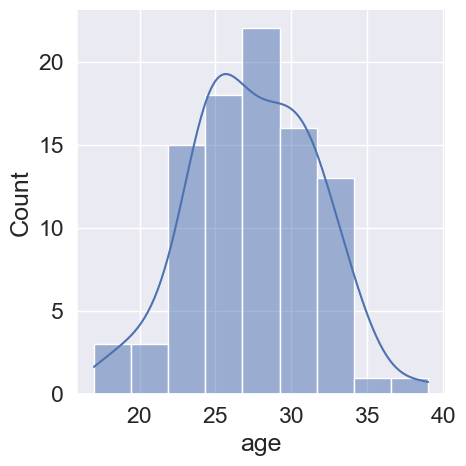

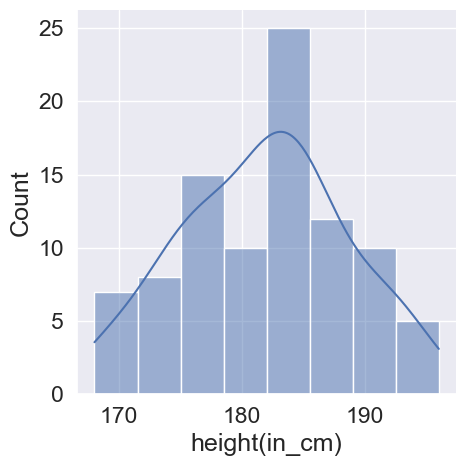

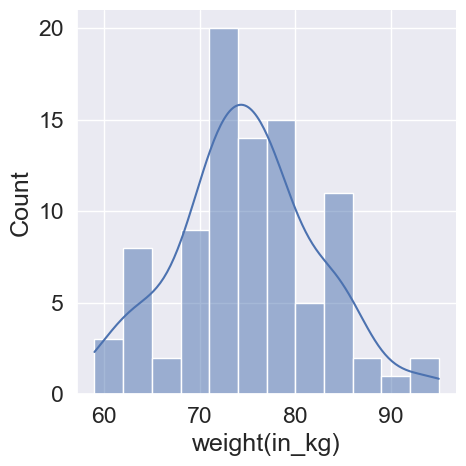

In [138]:
sns.displot(data=df_free_agents, x="overall", kde=True)
sns.displot(data=df_free_agents, x="age", kde=True)
sns.displot(data=df_free_agents, x="height(in_cm)", kde=True)
sns.displot(data=df_free_agents, x="weight(in_kg)", kde=True)

<AxesSubplot: xlabel='preferred_foot', ylabel='Count'>

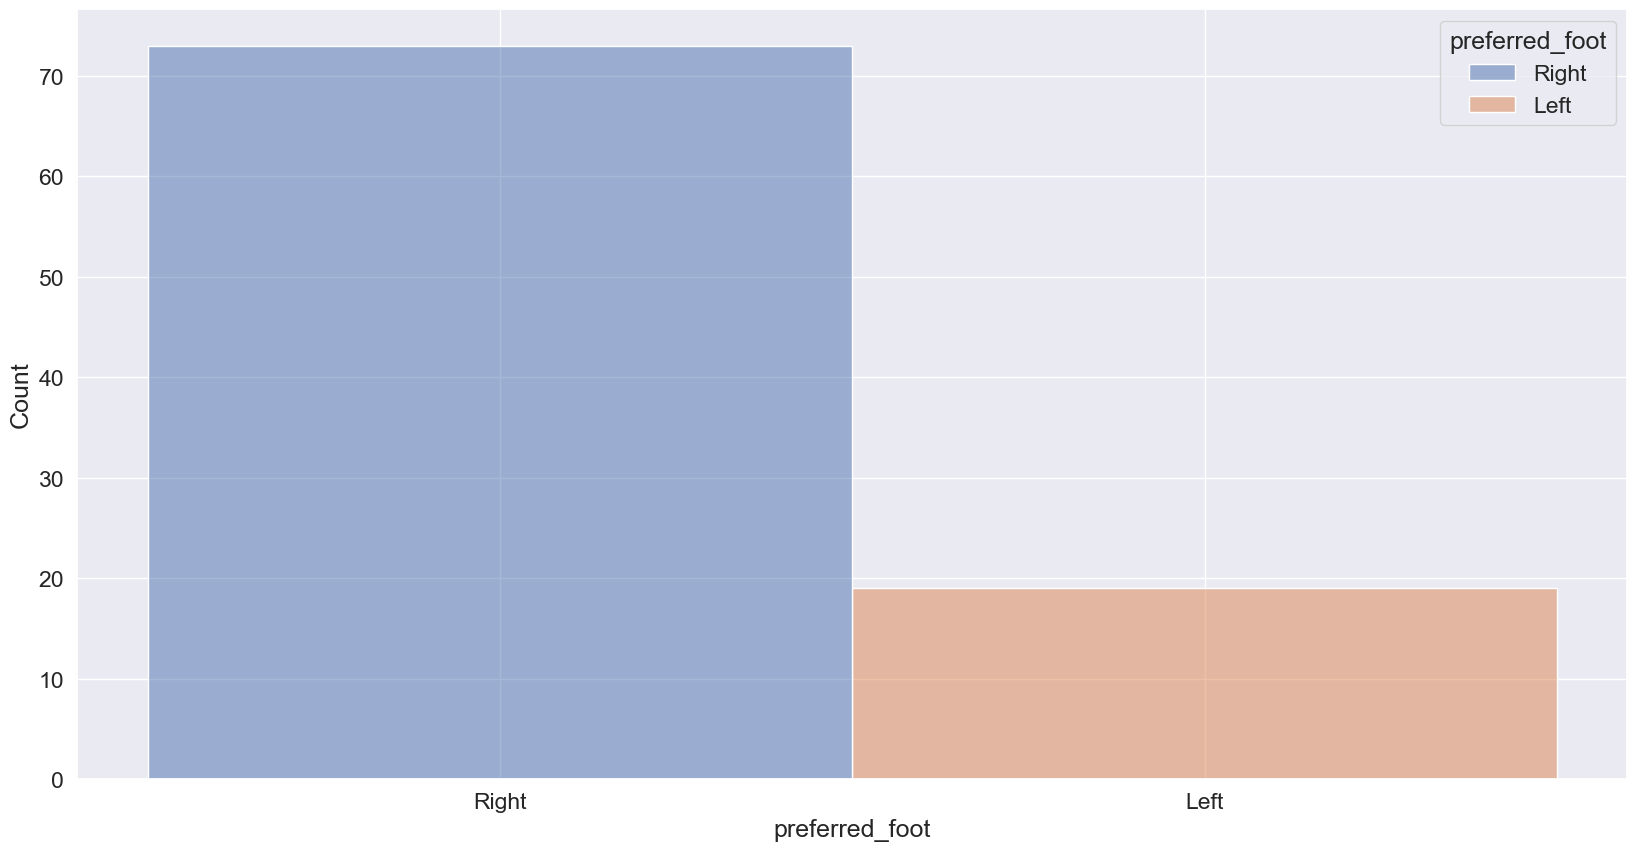

In [139]:
sns.histplot(data=df_free_agents, x="preferred_foot", hue="preferred_foot")

In [140]:
df_goalkeepers = df[df["zone_position"] == "G"]
df_defenders = df[df["zone_position"] == "D"]
df_midfielders = df[df["zone_position"] == "M"]
df_attackers = df[df["zone_position"] == "A"]

### df_goalkeepers

In [141]:
df_goalkeepers

,overall,potential,value(in_euro),positions_played,best_position,nationality,age,height(in_cm),weight(in_kg),totalstats,basestats,club_name,wage(in_euro),release_clause,club_position,contract_until,joined_on,on_loan,preferred_foot,weak_foot_rating,skill_moves,international_reputation,national_team_name,national_team_position,attacking_work_rate,defensive_work_rate,pace_total,shooting_total,passing_total,dribbling_total,defending_total,physicality_total,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,longpassing,ballcontrol,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,goalkeeper_diving,goalkeeper_handling,_goalkeeperkicking,goalkeeper_positioning,goalkeeper_reflexes,st_rating,lw_rating,lf_rating,cf_rating,rf_rating,rw_rating,cam_rating,lm_rating,cm_rating,rm_rating,lwb_rating,cdm_rating,rwb_rating,lb_rating,cb_rating,rb_rating,gk_rating,zone_position,qty_positions_played
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
89744ec0-992e-11ed-bf73-c65beec292cc,90,91,90000000,GK,GK,Belgium,30,199,96,1334,473,Real Madrid CF,250000,191300000,GK,2026,2018,-,Left,3,1,4,Belgium,GK,Medium,Medium,84,89,75,90,46,89,14,14,13,33,12,13,19,20,35,23,42,52,63,84,45,56,68,38,70,17,23,15,13,44,27,66,20,18,16,84,89,75,89,90,34,29,31,31,31,29,35,34,35,34,32,34,32,32,32,32,90,G,1
89744eca-992e-11ed-bf73-c65beec292cc,90,90,13500000,GK,GK,Germany,36,193,93,1535,501,FC Bayern München,72000,22300000,GK,2024,2011,-,Right,4,1,5,Germany,GK,Medium,Medium,87,88,91,88,56,91,15,13,25,60,11,30,14,11,68,46,54,60,51,87,35,68,77,43,80,16,29,30,12,70,47,70,17,10,11,87,88,91,91,88,43,40,43,43,43,40,50,47,53,47,39,46,39,38,37,38,90,G,1
89744f10-992e-11ed-bf73-c65beec292cc,89,91,85500000,GK,GK,Slovenia,29,188,87,1402,479,Atlético de Madrid,100000,181700000,GK,2023,2014,-,Right,3,1,5,-,-,Medium,Medium,86,90,78,89,49,87,13,11,15,43,13,12,13,14,40,30,43,58,65,87,49,59,77,41,78,12,34,21,11,65,11,68,27,12,18,86,90,78,87,89,36,32,34,34,34,32,41,37,41,37,35,40,35,35,36,35,90,G,1
89744f24-992e-11ed-bf73-c65beec292cc,89,91,88000000,GK,GK,Brazil,28,188,86,1583,502,Manchester City,210000,169400000,GK,2026,2017,-,Left,3,1,3,-,-,Medium,Medium,87,82,93,88,64,88,20,14,14,61,18,23,15,20,66,40,64,63,60,88,48,70,66,41,78,18,38,27,20,70,51,70,29,15,8,87,82,93,88,88,43,41,43,43,43,41,50,47,52,47,40,47,40,39,38,39,90,G,1
89744f38-992e-11ed-bf73-c65beec292cc,89,90,79000000,GK,GK,Brazil,29,191,91,1437,489,Liverpool,190000,152100000,GK,2027,2018,-,Right,3,1,3,-,-,Medium,Medium,86,85,85,89,54,90,17,13,29,60,20,27,19,18,58,40,58,49,40,87,37,64,52,32,78,14,27,11,13,66,23,68,15,19,16,86,85,85,90,89,42,38,41,41,41,38,48,45,49,45,36,42,36,35,35,35,90,G,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8977386a-992e-11ed-bf73-c65beec292cc,48,60,100000,GK,GK,India,19,183,84,829,258,Hyderabad FC,500,155000,SUB,2023,2020,-,Left,3,1,1,-,-,Medium,Medium,49,47,48,47,18,49,13,8,10,30,7,8,11,13,28,14,18,18,30,42,44,36,56,25,50,10,20,12,5,32,15,30,9,14,11,49,47,48,49,47,20,17,18,18,18,17,22,21,24,21,20,24,20,19,22,19,49,G,1
897738b0-992e-11ed-bf73-c65beec292cc,48,54,60000,GK,GK,China PR,21,182,70,836,269,Wuhan FC,800,105000,RES,2025,2021,-,Right,2,1,1,-,-,Medium,Medium,46,49,51,51,24,48,13,8,12,14,7,8,12,17,14,9,26,22,32,32,43,38,54,22,56,9,22,18,16,29,15,33,12,15,16,46,49,51,48,51,21,16,17,17,17,16,19,18,19,18,19,21,19,19,23,19,49,G,1
897738e2-992e-11ed-bf73-c65beec292cc,48,61,100000,GK,GK,India,19,185,68,833,279,NorthEast United FC,500,198000,RES,2023,2020,-,Right,3,1,1,-,-,Medium,M

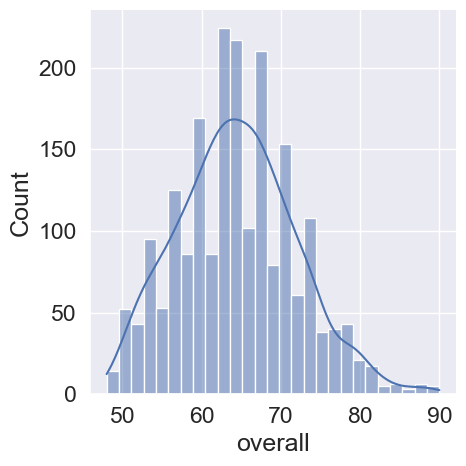

In [142]:
sns.displot(data=df_goalkeepers, x="overall", kde=True)


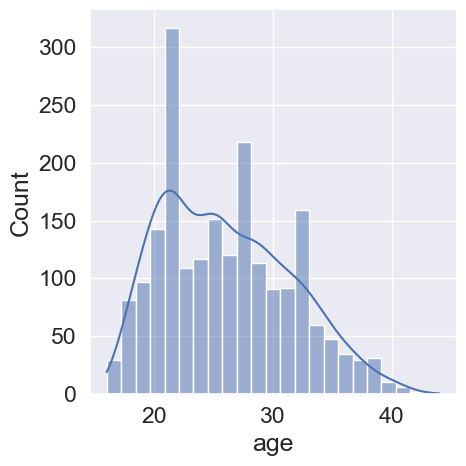

In [143]:
sns.displot(data=df_goalkeepers, x="age", kde=True)


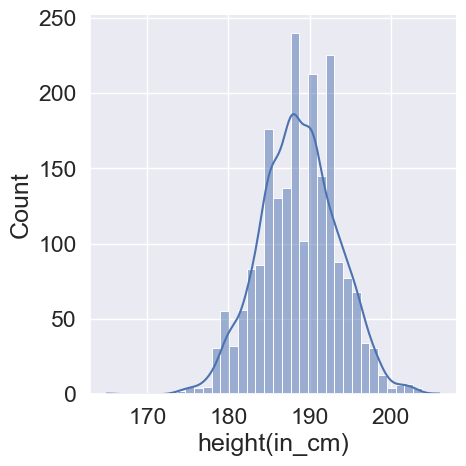

In [144]:
sns.displot(data=df_goalkeepers, x="height(in_cm)", kde=True)


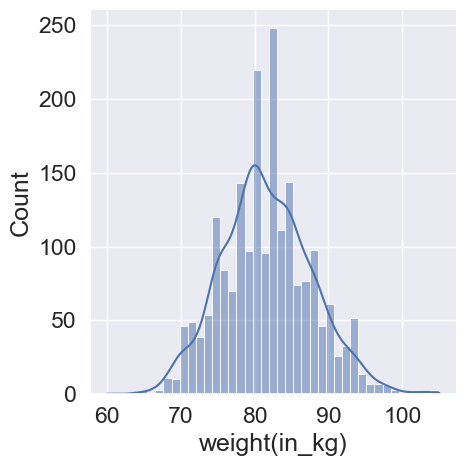

In [145]:
sns.displot(data=df_goalkeepers, x="weight(in_kg)", kde=True)

<AxesSubplot: xlabel='preferred_foot', ylabel='Count'>

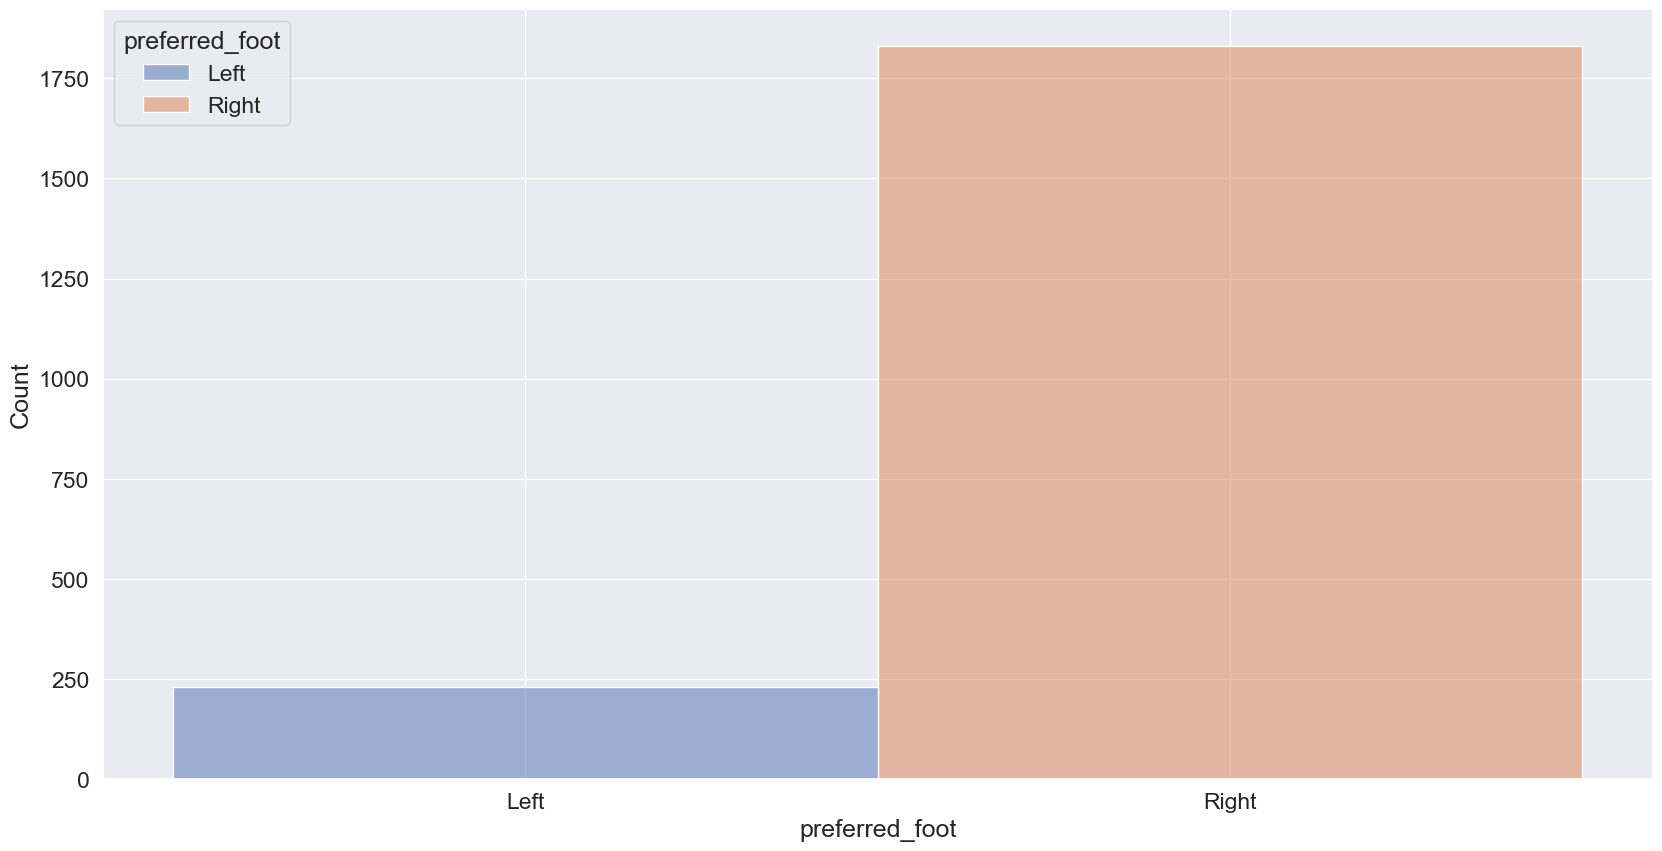

In [146]:
sns.histplot(data=df_goalkeepers, x="preferred_foot", hue="preferred_foot")

### df_defenders

In [147]:
df_defenders

,overall,potential,value(in_euro),positions_played,best_position,nationality,age,height(in_cm),weight(in_kg),totalstats,basestats,club_name,wage(in_euro),release_clause,club_position,contract_until,joined_on,on_loan,preferred_foot,weak_foot_rating,skill_moves,international_reputation,national_team_name,national_team_position,attacking_work_rate,defensive_work_rate,pace_total,shooting_total,passing_total,dribbling_total,defending_total,physicality_total,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,longpassing,ballcontrol,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,goalkeeper_diving,goalkeeper_handling,_goalkeeperkicking,goalkeeper_positioning,goalkeeper_reflexes,st_rating,lw_rating,lf_rating,cf_rating,rf_rating,rw_rating,cam_rating,lm_rating,cm_rating,rm_rating,lwb_rating,cdm_rating,rwb_rating,lb_rating,cb_rating,rb_rating,gk_rating,zone_position,qty_positions_played
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
89744ede-992e-11ed-bf73-c65beec292cc,90,90,98000000,CB,CB,Netherlands,30,193,92,2117,461,Liverpool,230000,181300000,CB,2025,2018,-,Right,3,2,4,Netherlands,CB,Medium,High,81,60,71,72,91,86,53,52,87,79,45,70,60,70,86,76,68,91,61,89,53,81,88,74,93,64,85,90,47,65,62,90,92,92,86,13,10,13,11,11,74,68,70,70,70,68,73,73,79,73,83,88,83,85,90,85,23,D,1
89744f42-992e-11ed-bf73-c65beec292cc,88,91,107500000,CB,CB,Portugal,25,187,82,1894,412,Manchester City,230000,206900000,CB,2027,2020,-,Right,4,2,3,Portugal,CB,Medium,High,63,39,66,68,88,88,54,29,87,82,32,64,46,48,76,74,57,67,60,89,56,74,78,83,89,26,92,85,39,51,45,81,90,89,85,7,8,13,7,12,64,59,60,60,60,59,65,67,73,67,81,86,81,83,90,83,21,D,1
89744f6a-992e-11ed-bf73-c65beec292cc,88,88,82500000,"LB,RB",LB,Portugal,28,182,74,2262,482,Manchester City,250000,152600000,LB,2027,2019,-,Right,4,4,3,Portugal,RB,High,Medium,85,73,85,85,81,73,88,69,72,88,62,86,87,69,79,87,86,84,79,85,78,80,72,91,62,79,76,82,81,85,52,86,81,84,80,6,9,15,14,14,81,84,83,83,83,84,87,88,87,88,88,86,88,87,82,87,22,D,2
89744f74-992e-11ed-bf73-c65beec292cc,88,90,92000000,CB,CB,Brazil,28,183,75,2082,453,Paris Saint-Germain,170000,177100000,CB,2024,2013,-,Right,3,3,3,-,-,Medium,High,79,56,75,74,89,80,68,59,88,84,35,69,58,32,85,79,77,81,68,88,66,65,92,82,78,45,81,89,70,76,52,86,90,89,89,6,6,12,10,13,75,73,73,73,73,73,78,79,82,79,86,88,86,87,90,87,21,D,1
89744f9c-992e-11ed-bf73-c65beec292cc,87,88,73500000,CB,CB,Germany,29,190,85,2011,444,Real Madrid CF,250000,156200000,CB,2026,2022,-,Right,3,2,2,Germany,CB,High,High,82,53,71,67,86,85,68,40,82,80,34,64,50,56,78,72,72,91,56,85,50,77,84,71,90,67,92,84,49,61,40,78,88,87,84,14,15,10,12,8,69,67,67,67,67,67,69,71,74,71,81,83,81,83,88,83,22,D,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89773824-992e-11ed-bf73-c65beec292cc,48,62,110000,LB,LB,Republic of Ireland,19,169,70,1196,254,Finn Harps,500,239000,SUB,2022,2022,-,Left,2,2,1,-,-,Medium,Low,61,26,32,45,44,46,47,26,39,28,20,49,28,28,23,34,68,55,51,45,75,28,50,51,41,21,51,46,43,32,34,36,41,47,48,11,9,10,6,11,39,41,39,39,39,41,39,44,37,44,47,41,47,48,46,48,15,D,1
89773856-992e-11ed-bf73-c65beec292cc,48,58,100000,LB,CB,China PR,20,186,70,1117,239,Hebei FC,1000,175000,RES,2027,2022,-,Right,3,2,1,-,-,Medium,Medium,58,22,30,28,49,52,35,16,49,33,26,20,24,25,22,26,61,55,43,46,54,35,57,49,56,18,46,45,25,26,32,45,50,50,51,6,11,9,10,6,35,31,30,30,30,31,31,35,33,35,45,43,45,48,50,48,14,D,1
89773892-992e-11ed-bf73-c65beec292cc,48,56,100000,CB,CB,China PR,21,185,75,1144,239,Hebei FC,1000,175000,SUB,2027,202

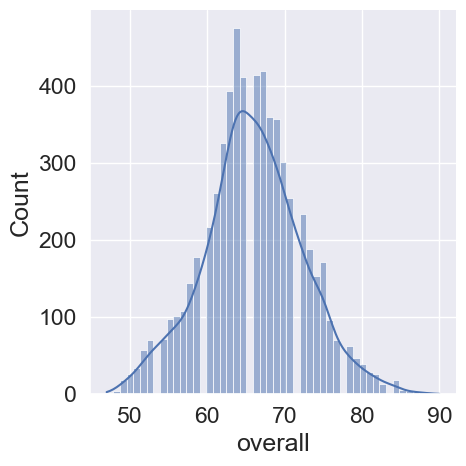

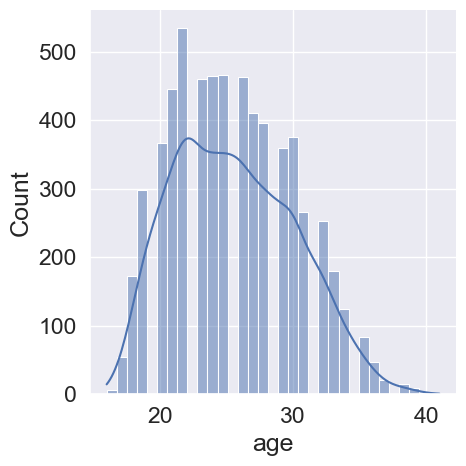

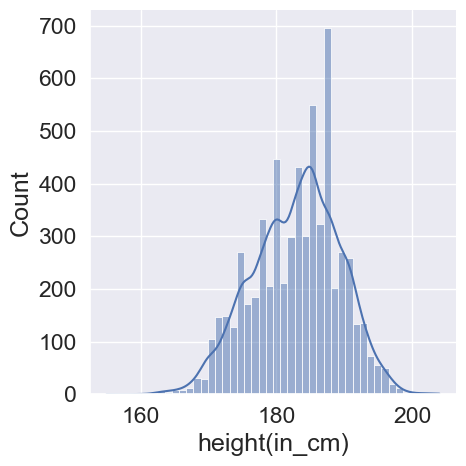

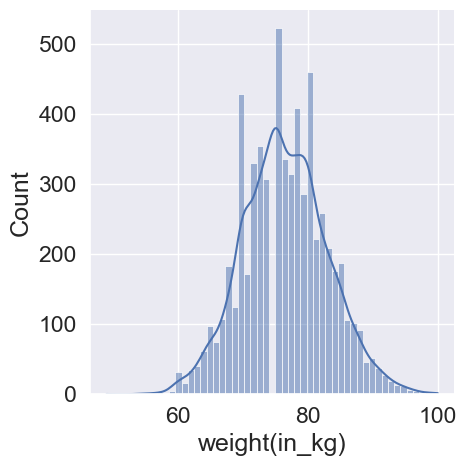

In [148]:
sns.displot(data=df_defenders, x="overall", kde=True)
sns.displot(data=df_defenders, x="age", kde=True)
sns.displot(data=df_defenders, x="height(in_cm)", kde=True)
sns.displot(data=df_defenders, x="weight(in_kg)", kde=True)


<AxesSubplot: xlabel='preferred_foot', ylabel='Count'>

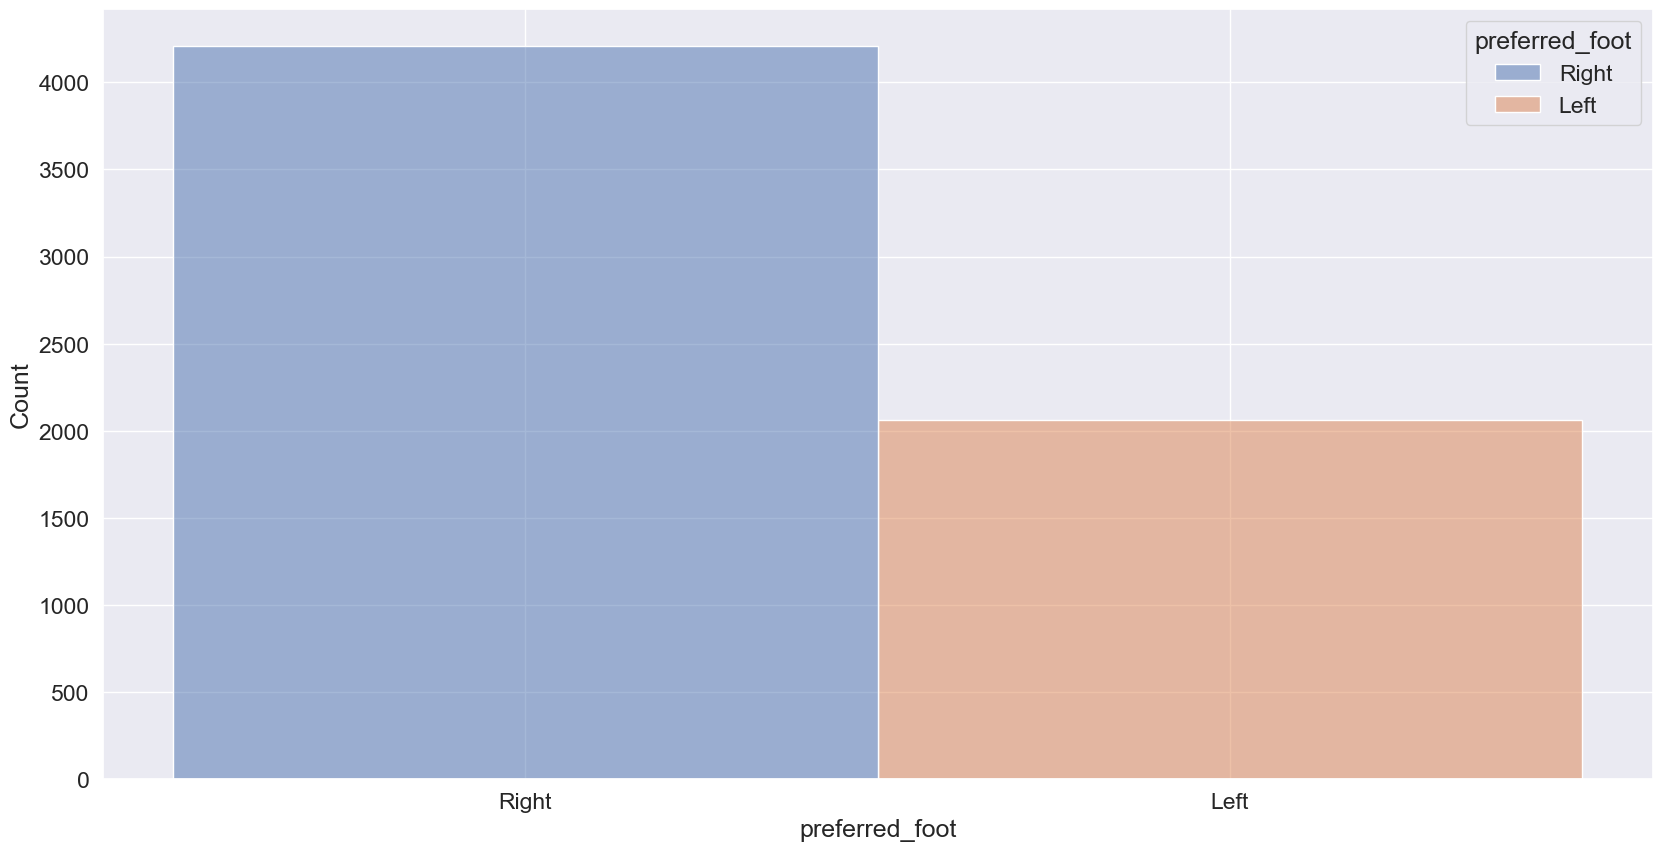

In [149]:
sns.histplot(data=df_defenders, x="preferred_foot", hue="preferred_foot")


### df_midfielders

In [150]:
df_midfielders

,overall,potential,value(in_euro),positions_played,best_position,nationality,age,height(in_cm),weight(in_kg),totalstats,basestats,club_name,wage(in_euro),release_clause,club_position,contract_until,joined_on,on_loan,preferred_foot,weak_foot_rating,skill_moves,international_reputation,national_team_name,national_team_position,attacking_work_rate,defensive_work_rate,pace_total,shooting_total,passing_total,dribbling_total,defending_total,physicality_total,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,longpassing,ballcontrol,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,goalkeeper_diving,goalkeeper_handling,_goalkeeperkicking,goalkeeper_positioning,goalkeeper_reflexes,st_rating,lw_rating,lf_rating,cf_rating,rf_rating,rw_rating,cam_rating,lm_rating,cm_rating,rm_rating,lwb_rating,cdm_rating,rwb_rating,lb_rating,cb_rating,rb_rating,gk_rating,zone_position,qty_positions_played
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
89744e48-992e-11ed-bf73-c65beec292cc,91,91,54000000,RW,CAM,Argentina,35,169,67,2190,452,Paris Saint-Germain,195000,99900000,RW,2023,2021,-,Left,4,4,5,Argentina,RW,Low,Low,81,89,90,94,34,64,84,90,70,91,88,95,93,93,90,93,87,76,91,92,95,86,68,70,68,91,44,40,93,94,75,96,20,35,24,6,11,15,14,8,90,90,91,91,91,90,91,91,88,91,67,66,67,62,53,62,22,M,1
89744ea2-992e-11ed-bf73-c65beec292cc,91,91,107500000,"CM,CAM",CM,Belgium,31,181,70,2303,483,Manchester City,350000,198900000,CM,2025,2015,-,Right,5,4,4,Belgium,RF,High,High,74,88,93,87,64,77,94,85,55,93,83,88,89,83,93,90,76,73,76,91,78,92,63,88,74,91,75,66,88,94,83,89,68,65,53,15,13,5,10,13,86,88,87,87,87,88,91,91,91,91,82,82,82,78,72,78,24,M,2
89744f06-992e-11ed-bf73-c65beec292cc,89,89,86000000,CDM,CDM,Brazil,30,185,84,2209,460,Manchester United,240000,163400000,SUB,2026,2022,-,Right,3,2,3,-,-,Medium,High,63,73,75,72,87,90,58,64,79,84,62,67,62,74,83,78,60,66,61,87,66,88,85,90,90,81,91,88,75,75,66,84,87,88,87,13,14,16,12,12,78,71,75,75,75,71,78,76,84,76,83,89,83,84,89,84,24,M,1
89744f1a-992e-11ed-bf73-c65beec292cc,89,89,99500000,"LM,CF",LM,Senegal,30,174,69,2188,462,FC Bayern München,145000,164200000,ST,2025,2022,-,Right,4,4,4,-,-,High,Medium,90,83,80,88,44,77,78,86,84,84,75,88,77,64,71,86,91,90,93,91,88,83,87,85,72,78,75,35,90,84,75,84,42,42,38,10,10,15,7,14,89,86,87,87,87,86,89,89,82,89,71,68,71,68,62,68,22,M,2
89744f2e-992e-11ed-bf73-c65beec292cc,89,90,105500000,"CDM,RB",CDM,Germany,27,177,75,2283,473,FC Bayern München,130000,182000000,CDM,2025,2015,-,Right,4,3,4,Germany,CDM,High,Medium,68,72,87,84,83,79,91,68,72,87,69,82,85,69,90,85,77,60,84,88,84,78,79,94,68,83,89,84,80,85,44,85,85,85,78,8,15,7,15,15,80,81,80,80,80,81,85,86,89,86,87,89,87,86,84,86,24,M,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89773950-992e-11ed-bf73-c65beec292cc,48,54,70000,"RM,LM",CDM,China PR,23,176,68,1365,282,Hebei FC,1000,123000,RES,2022,2020,-,Right,3,2,1,-,-,Medium,Medium,54,36,46,51,48,47,33,32,45,52,32,47,38,33,46,48,64,46,66,53,77,45,58,45,45,35,54,54,43,54,34,41,39,54,46,14,7,8,12,6,46,47,47,47,47,47,51,49,51,49,50,52,50,50,51,50,16,M,2
89773964-992e-11ed-bf73-c65beec292cc,47,60,110000,CM,CAM,China PR,19,175,70,1352,285,Wuhan FC,950,239000,RES,2023,2022,-,Right,3,2,1,-,-,Medium,Medium,64,37,47,49,40,48,36,31,44,57,33,49,32,34,54,44,61,66,57,49,75,54,57,44,47,31,55,40,49,41,36,38,38,38,43,12,11,11,11,12,48,47,47,47,47,47,50,50,49,50,47,48,47,47,46,47,18,M,1
8977396e-992e-11ed-bf73-c65beec292cc,47,56,110000,"ST,RM",CAM,Republic of Ireland,21,174,68,1287,274,Sli

In [151]:
df_midfielders.best_position.unique()

array(['CAM', 'CM', 'CDM', 'LM', 'RM'], dtype=object)

In [152]:
df_attackers.best_position.unique()

array(['CF', 'ST', 'RW', 'LW'], dtype=object)

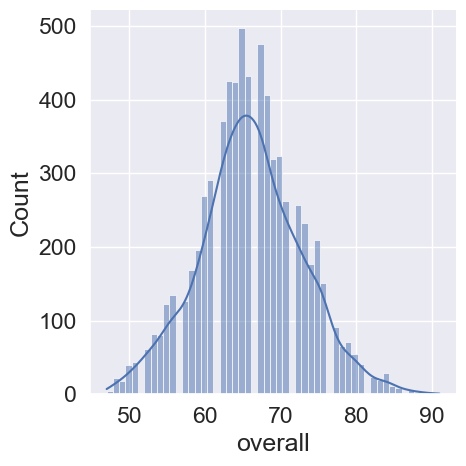

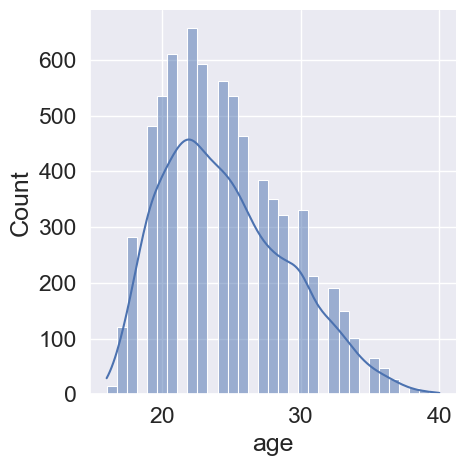

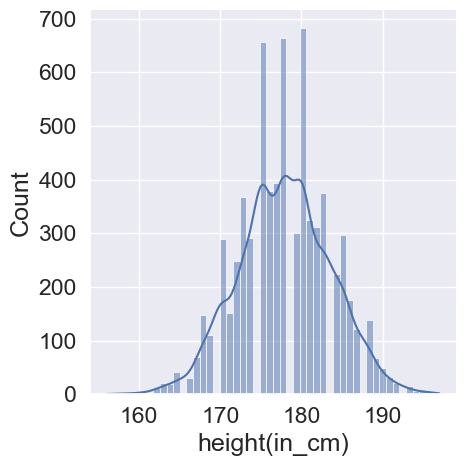

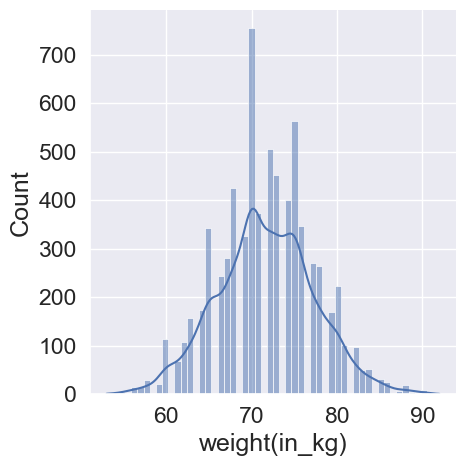

In [153]:
sns.displot(data=df_midfielders, x="overall", kde=True)
sns.displot(data=df_midfielders, x="age", kde=True)
sns.displot(data=df_midfielders, x="height(in_cm)", kde=True)
sns.displot(data=df_midfielders, x="weight(in_kg)", kde=True)

<AxesSubplot: xlabel='preferred_foot', ylabel='Count'>

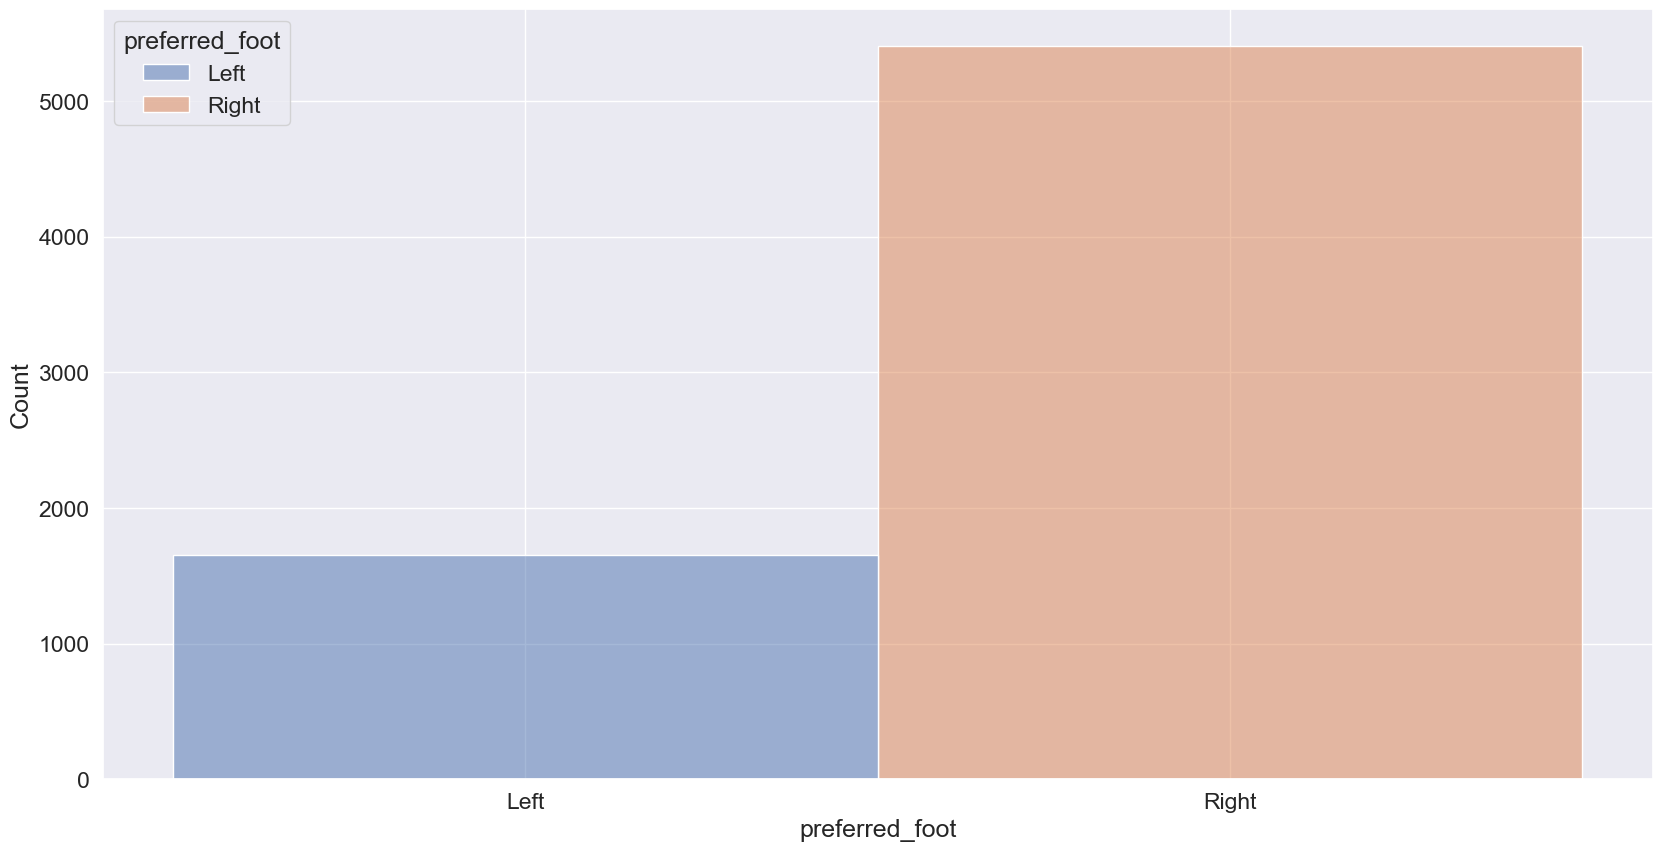

In [154]:
sns.histplot(data=df_midfielders, x="preferred_foot", hue="preferred_foot")


### df_attackers

In [155]:
df_attackers

,overall,potential,value(in_euro),positions_played,best_position,nationality,age,height(in_cm),weight(in_kg),totalstats,basestats,club_name,wage(in_euro),release_clause,club_position,contract_until,joined_on,on_loan,preferred_foot,weak_foot_rating,skill_moves,international_reputation,national_team_name,national_team_position,attacking_work_rate,defensive_work_rate,pace_total,shooting_total,passing_total,dribbling_total,defending_total,physicality_total,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,longpassing,ballcontrol,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,goalkeeper_diving,goalkeeper_handling,_goalkeeperkicking,goalkeeper_positioning,goalkeeper_reflexes,st_rating,lw_rating,lf_rating,cf_rating,rf_rating,rw_rating,cam_rating,lm_rating,cm_rating,rm_rating,lwb_rating,cdm_rating,rwb_rating,lb_rating,cb_rating,rb_rating,gk_rating,zone_position,qty_positions_played
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
89744e84-992e-11ed-bf73-c65beec292cc,91,91,64000000,"CF,ST",CF,France,34,185,81,2147,455,Real Madrid CF,450000,131199999,CF,2023,2009,-,Right,4,4,4,France,ST,Medium,Medium,80,88,83,87,39,78,75,92,90,89,88,87,82,73,76,91,79,80,78,92,72,87,79,82,82,80,63,39,92,89,84,90,43,24,18,13,11,5,5,7,91,87,89,89,89,87,91,89,84,89,67,67,67,63,58,63,21,A,2
89744e98-992e-11ed-bf73-c65beec292cc,91,91,84000000,ST,ST,Poland,33,185,81,2205,458,FC Barcelona,420000,172200000,ST,2025,2022,-,Right,4,4,5,Poland,ST,High,Medium,75,91,79,86,44,83,71,94,91,84,89,85,79,85,70,89,76,75,77,93,82,91,85,76,87,84,81,49,94,81,90,88,35,42,19,15,6,12,8,10,91,85,88,88,88,85,88,86,83,86,67,69,67,64,63,64,22,A,1
89744eac-992e-11ed-bf73-c65beec292cc,91,95,190500000,"ST,LW",ST,France,23,182,73,2177,470,Paris Saint-Germain,230000,366700000,ST,2024,2018,-,Right,4,5,4,France,ST,High,Low,97,89,80,92,36,76,78,93,72,85,83,93,80,69,71,91,97,97,93,93,81,88,77,87,76,82,64,38,92,83,80,88,26,34,32,13,5,7,11,6,92,90,90,90,90,90,92,92,84,92,70,66,70,66,57,66,21,A,2
89744eb6-992e-11ed-bf73-c65beec292cc,90,90,115500000,RW,RW,Egypt,30,175,71,2226,471,Liverpool,270000,213700000,RW,2023,2017,-,Left,3,4,4,-,-,High,Medium,90,89,82,90,45,75,80,93,59,84,84,90,84,69,77,88,89,91,90,93,91,83,69,87,75,85,63,55,92,85,86,92,38,43,41,14,14,9,11,14,89,88,88,88,88,88,90,90,85,90,74,71,74,70,61,70,25,A,1
89744ed4-992e-11ed-bf73-c65beec292cc,90,90,41000000,ST,ST,Portugal,37,187,83,2159,445,Manchester United,220000,77900000,SUB,2023,2021,-,Right,4,5,5,Portugal,ST,High,Low,81,92,78,85,34,75,80,93,90,80,86,85,81,79,75,88,79,83,77,94,67,93,95,76,77,90,63,29,95,76,90,95,24,32,24,7,11,15,14,11,90,86,88,88,88,86,88,87,81,87,65,62,65,61,56,61,23,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897737f2-992e-11ed-bf73-c65beec292cc,48,58,100000,ST,ST,China PR,20,181,70,1236,256,Dalian Professional Football Club,1000,175000,SUB,2022,2022,-,Right,3,2,1,-,-,High,Low,58,50,37,45,18,48,31,53,48,37,38,44,39,30,31,40,57,59,57,51,66,47,63,54,49,48,33,18,49,48,56,42,12,16,16,6,7,12,8,13,50,46,47,47,47,46,47,47,42,47,36,33,36,35,31,35,15,A,1
89773838-992e-11ed-bf73-c65beec292cc,48,61,110000,ST,ST,China PR,19,182,75,1182,254,Guangzhou City,1000,239000,SUB,2027,2022,-,Right,3,2,1,-,-,Medium,Medium,57,47,37,47,19,47,32,48,50,37,32,46,36,29,33,45,55,59,53,44,52,44,50,51,54,50,22,19,50,45,51,46,13,18,12,10,11,7,14,10,50,46,47,47,47,46,47,47,42,47,35,33,35,34,31,34,17,A,1
8977389c-992e-11ed-bf73-c65beec292cc,48,57,100000,ST,ST,China PR,23,188,65,1159,260,Dalian Professional Football Cl

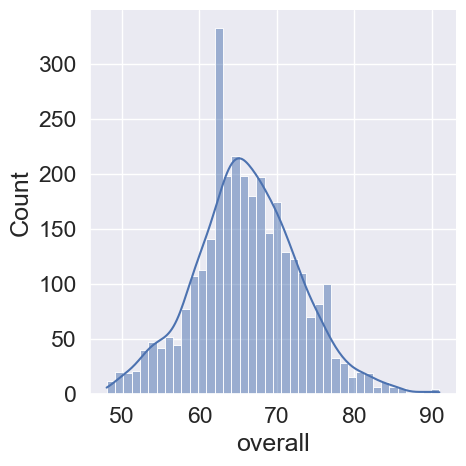

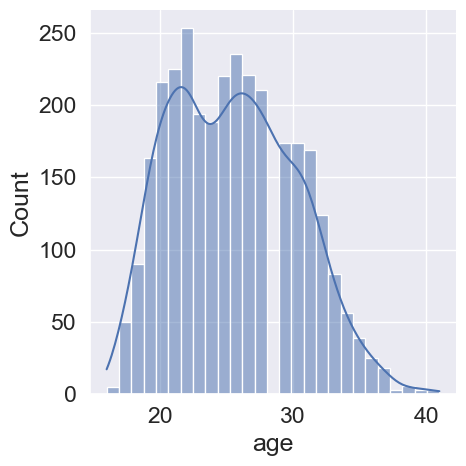

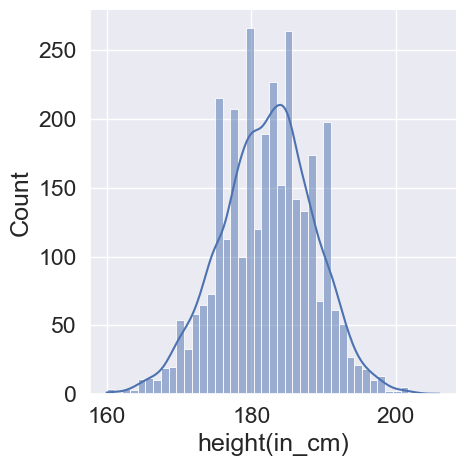

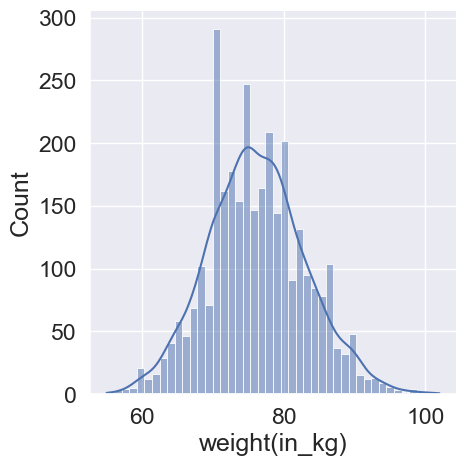

In [156]:
sns.displot(data=df_attackers, x="overall", kde=True)
sns.displot(data=df_attackers, x="age", kde=True)
sns.displot(data=df_attackers, x="height(in_cm)", kde=True)
sns.displot(data=df_attackers, x="weight(in_kg)", kde=True)

<AxesSubplot: xlabel='preferred_foot', ylabel='Count'>

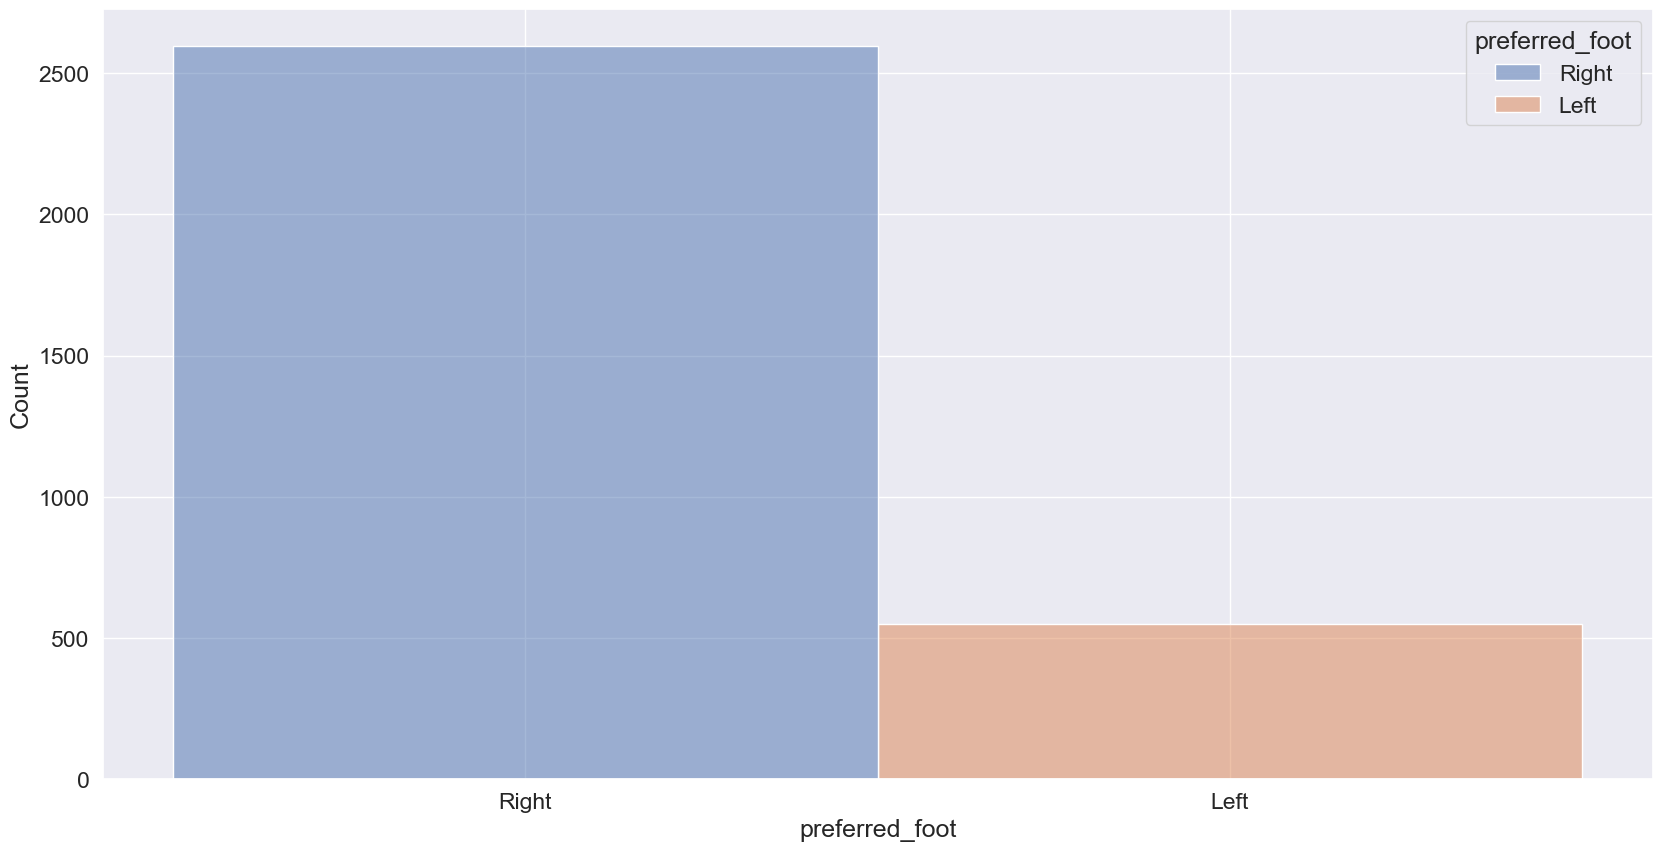

In [157]:
sns.histplot(data=df_attackers, x="preferred_foot", hue="preferred_foot")


### To compare vs reality

In [158]:
#Top 20 Club teams with highest player's average value

club = df.groupby('club_name')['value(in_euro)'].mean().reset_index().sort_values('value(in_euro)', ascending=True).tail(20)
fig = px.bar(club, x="value(in_euro)", y="club_name", orientation='h')
fig.show()

In [159]:
#Top 20 Club teams with highest player's average Overall rating

club = df.groupby('club_name')['overall'].mean().reset_index().sort_values('overall', ascending=True).tail(20)
fig = px.bar(club, x="overall", y="club_name", orientation='h')
fig.show()

In [160]:
#Top 20 National teams with highest player's average value

club = df.groupby('national_team_name')['value(in_euro)'].mean().reset_index().sort_values('value(in_euro)', ascending=True).tail(20)
fig = px.bar(club, x="value(in_euro)", y="national_team_name", orientation='h')
fig.update_traces(marker_color='green')
fig.show()

In [161]:
#Top 20 National teams with highest player's average Overall rating

club = df.groupby('national_team_name')['overall'].mean().reset_index().sort_values('overall', ascending=True).tail(20)
fig = px.bar(club, x="overall", y="national_team_name", orientation='h')
fig.update_traces(marker_color='green')
fig.show()

### AgeDistribution

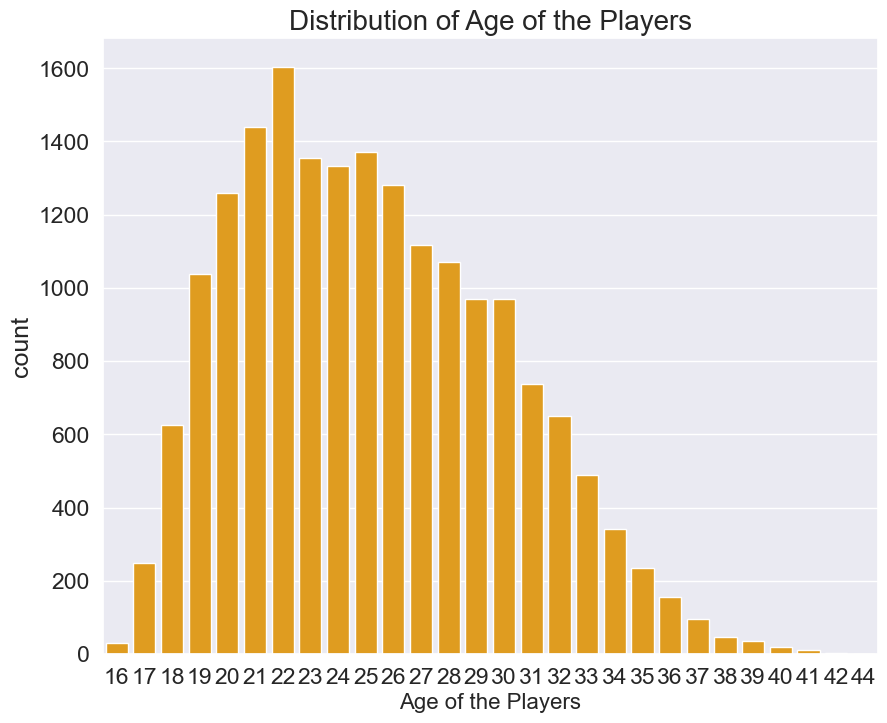

In [162]:
#AgeDistribution
x = df["age"]
plt.figure(figsize=(10,8))
ax = sns.countplot(x,color="orange")
ax.set_xlabel(xlabel = "Age of the Players", fontsize = 16)
ax.set_title(label = "Distribution of Age of the Players", fontsize = 20)
plt.show()

### Distribution of Age By Potential and Overall Rating

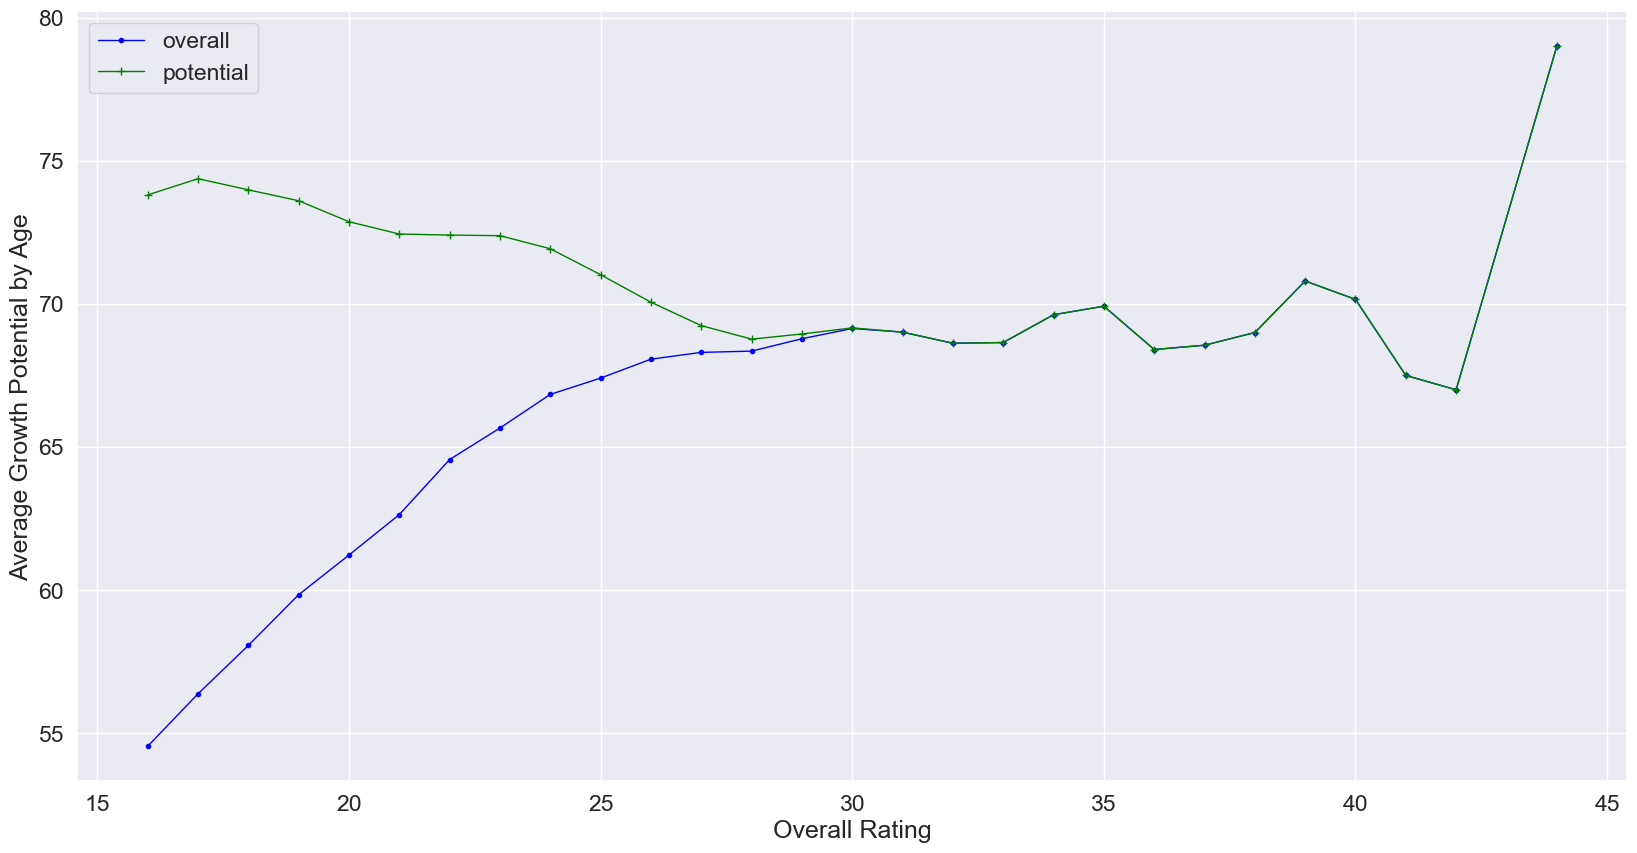

In [163]:
#Distribution of Age By Potential and Overall Rating

overall = pd.DataFrame(df.groupby(["age"])['overall'].mean())
potential = pd.DataFrame(df.groupby(["age"])['potential'].mean())

merged = pd.merge(overall, potential, on='age', how='inner')
merged['age']= merged.index

fig, ax = plt.subplots(figsize=(20,10))

merged.reset_index(drop = True, inplace = True)

plt.plot('age', 'overall', data=merged, marker='.', color='blue', lw=1, label ="overall" )
plt.plot('age', 'potential', data=merged, marker='+', color='green', lw=1, label = "potential")
plt.xlabel('Overall Rating')
plt.ylabel('Average Growth Potential by Age')
plt.legend();

In [164]:
#Features for players position
player_features = ['skill_moves', 'pace_total', 'shooting_total', 'passing_total', 'dribbling_total', 'defending_total', 'physicality_total', 'crossing',
                   'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'freekick_accuracy', 'longpassing', 'ballcontrol', 'acceleration', 
                   'sprint_speed', 'agility', 'reactions', 'balance','shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 
                   'vision', 'penalties', 'composure', 'marking', 'standing_tackle', 'sliding_tackle', 'goalkeeper_diving', 'goalkeeper_handling', '_goalkeeperkicking', 'goalkeeper_positioning', 'goalkeeper_reflexes']

#'overall', 'potential', 'value(in_euro)', 'totalstats', 'basestats'
 
df_position  = pd.DataFrame()
for position_name, features in df.groupby(df['best_position'])[player_features].mean().iterrows():
    top_features = dict(features.nlargest(10))
    df_position[position_name] = tuple(top_features)
df_position.head(10)

,CAM,CB,CDM,CF,CM,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
0,balance,strength,stamina,agility,stamina,dribbling_total,sprint_speed,acceleration,acceleration,sprint_speed,pace_total,acceleration,acceleration,acceleration,strength
1,agility,jumping,physicality_total,acceleration,short_passing,goalkeeper_reflexes,pace_total,pace_total,agility,pace_total,sprint_speed,pace_total,pace_total,pace_total,sprint_speed
2,acceleration,physicality_total,aggression,pace_total,balance,pace_total,acceleration,sprint_speed,pace_total,acceleration,acceleration,sprint_speed,agility,sprint_speed,pace_total
3,pace_total,standing_tackle,strength,dribbling,ballcontrol,goalkeeper_diving,stamina,agility,sprint_speed,stamina,stamina,agility,sprint_speed,stamina,jumping
4,sprint_speed,aggression,short_passing,ballcontrol,longpassing,physicality_total,balance,balance,balance,balance,balance,balance,balance,agility,acceleration
5,dribbling_total,defending_total,balance,sprint_speed,agility,goalkeeper_positioning,agility,dribbling,dribbling,agility,agility,stamina,dribbling,balance,shot_power
6,dribbling,heading_accuracy,jumping,dribbling_total,vision,shooting_total,jumping,dribbling_total,dribbling_total,jumping,jumping,dribbling,dribbling_total,jumping,finishing
7,ballcontrol,marking,standing_tackle,balance,dribbling_total,goalkeeper_handling,physicality_total,stamina,ballcontrol,physicality_total,physicality_total,dribbling_total,ballcontrol,physicality_total,positioning
8,short_passing,stamina,longpassing,positioning,physicality_total,passing_total,standing_tackle,ballcontrol,shot_power,dribbling_total,standing_tackle,ballcontrol,shot_power,dribbling_total,physicality_total
9,vision,sliding_tackle,ballcontrol,shot_power,dribbling,_goalkeeperkicking,sliding_tackle,short_passing,positioning,crossing,strength,short_passing,positioning,standing_tackle,agility


In [165]:
#position = []
#player = []
#club_l = []
#for col in df_position.columns:
#    tmp_df = pd.DataFrame()
#    l = [df_position[col].values]
#    l = l[0]
#    l = list(l)
#    l.append('known_as')
#    tmp_df = pd.DataFrame.copy(df[df['best_position'] == col][l])
#    tmp_df['mean'] = np.mean(tmp_df.iloc[: , :-1] , axis = 1)
#    name = tmp_df['known_as'][tmp_df['mean'] == tmp_df['mean'].max()].values[0]
#    club = df['club_name'][df['known_as'] == str(name)].values[0]
#    position.append(col)
#    player.append(name)
#    club_l.append(club)
#    
#gk = ['GK']
#forward = ['LS', 'ST', 'RS','LF', 'CF', 'RF']
#midfeilder = ['LW','RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM',
#              'RCM', 'RM', 'LDM', 'CDM', 'RDM' ]
#defenders = ['LWB','RWB', 'LB', 'LCB', 'CB', "RB"]
#
#print('GoalKeeper : ')
#for p , n , c in zip(position , player , club_l):
#    if p in gk:
#        print('{} [Club : {} , Position : {}]'.format(n , c , p))
#print('\nFORWARD : ')
#for p , n , c in zip(position , player , club_l):
#    if p in forward:
#        print('{} [Club : {} , Position : {}]'.format(n , c , p))
#print('\nMIDFEILDER : ')
#for p , n , c in zip(position , player , club_l):
#    if p in midfeilder:
#        print('{} [Club : {} , Position : {}]'.format(n , c , p))
#print('\nDEFENDER : ')
#for p , n , c in zip(position , player , club_l):
#    if p in defenders:
#        print('{} [Club : {} , Position : {}]'.format(n , c , p))

### correlation numerical

In [166]:
def create_multicoll_df(unique_couples, corr: pd.DataFrame) -> pd.DataFrame:
    """
    Structure multicollinearity information in a DataFrame.
    It should not be called directly.
    """
    data = []
    for couple in unique_couples:
        corr_value = corr[couple[1]].loc[corr.index == couple[0]].item()
        data.append([couple[0], couple[1], corr_value])
    df_mult = pd.DataFrame(data=data, columns=['feat1', 'feat2', 'corr'])
    return df_mult.sort_values(by='feat1').reset_index(drop=True)

def report_multicoll(data: pd.DataFrame, corr_thresh: float = 0.3,
                     corr_method='pearson') -> pd.DataFrame:
    """
    Identify and report multicollinearity in a dataset.

    Parameters:
    ----------
    data: pandas.DataFrame
        dataset
    corr_thresh: float, default = 0.3
        Correlation threshold that identifies multicollinearity.
    corr_method: {'pearson', 'kendall', 'spearman'} or callable, default='pearson'
        Method of correlation. For additional documentation refer to:
        <https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html>

    Returns:
    -------
    report: pandas.DataFrame
        Report where features with multicollinearity are displayed together 
        with their correlation coefficient.
    """
    corr = data.corr(method=corr_method)
    # drop correlation below threshold or correlations with feature itself
    cond = (corr.apply(abs) < corr_thresh) | (corr == 1.0)
    masked_corr = corr.mask(cond)
    masked_corr = masked_corr.dropna(axis=1, how='all')
    masked_corr = masked_corr.dropna(axis=0, how='all')

    # create unique features coupled with multicollinearity
    multicoll_couples = []
    for feature1 in masked_corr.index:
        feature2_lst = masked_corr.loc[feature1].dropna().index.tolist()
        multicoll_couples.extend([(feature1, feat2) for feat2 in feature2_lst])
    sorted_couples = [sorted(couple) for couple in multicoll_couples]
    unique_couples = [list(x) for x in set(tuple(x) for x in sorted_couples)]
    return create_multicoll_df(unique_couples, corr)

multicol_df = report_multicoll(df)
pos_multic_df = multicol_df[multicol_df["corr"] > 0]
neg_multic_df = multicol_df[multicol_df["corr"] < 0]

<AxesSubplot: >

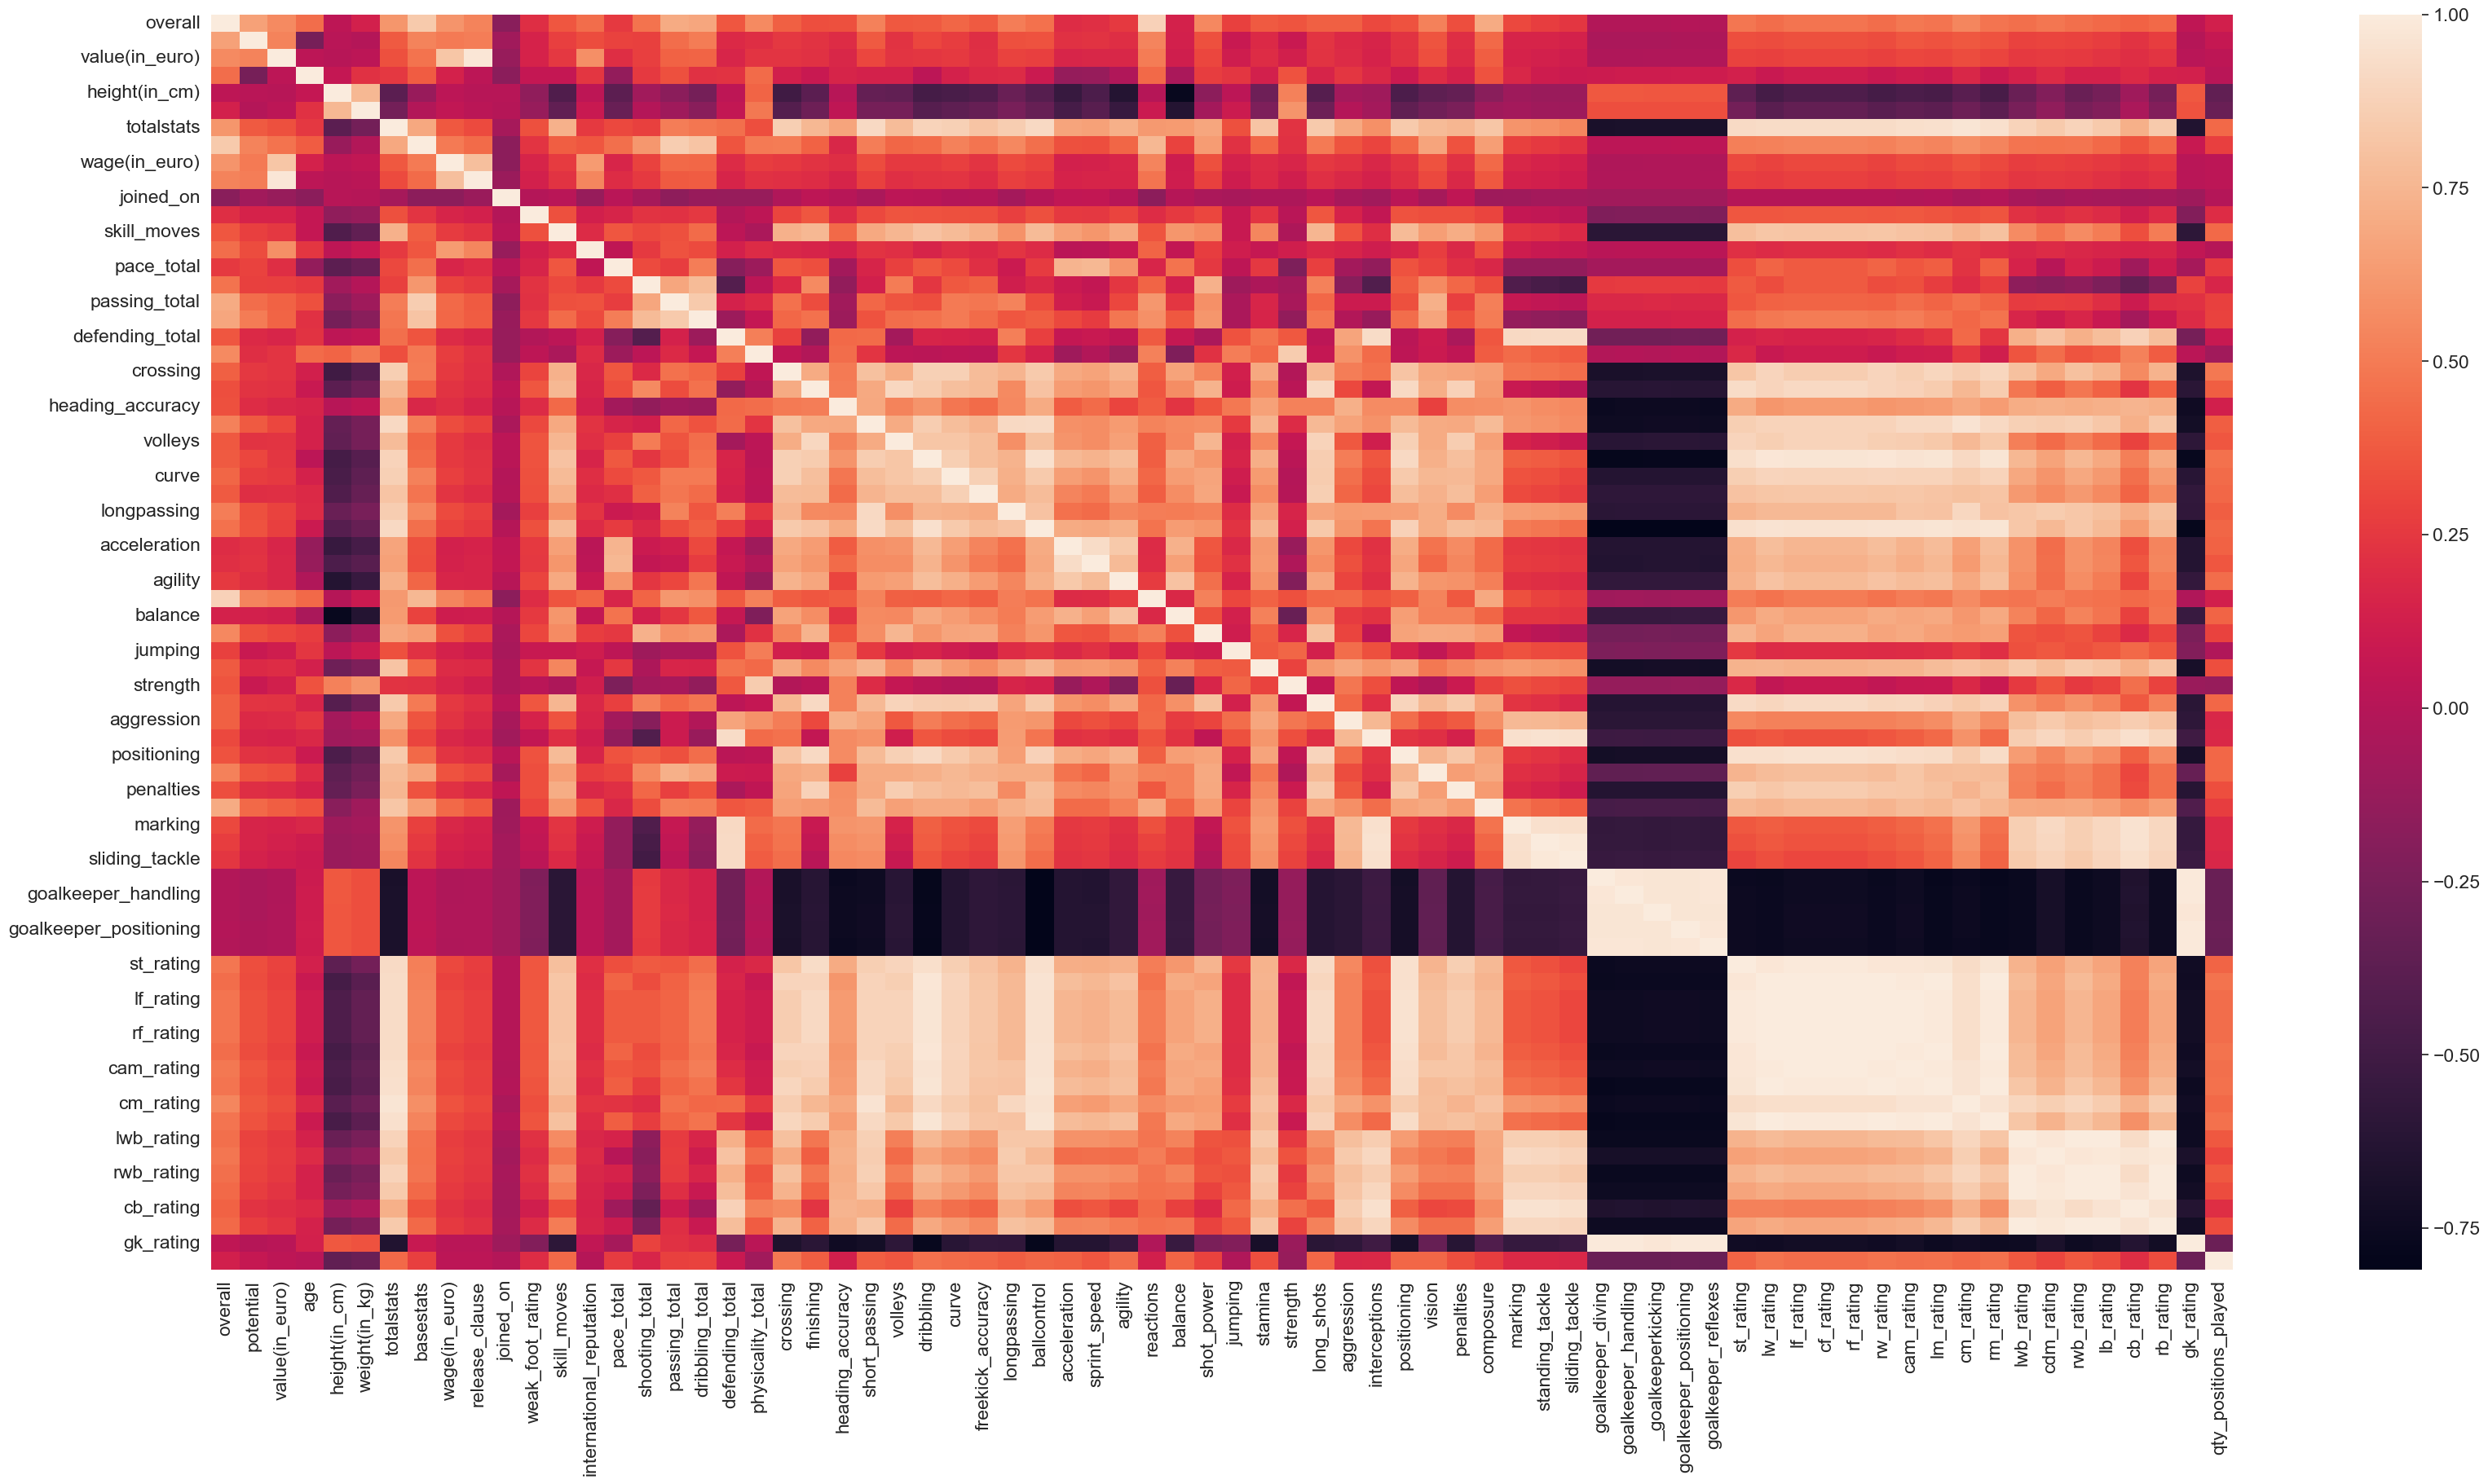

In [167]:
plt.figure(figsize=(40,20))
sns.heatmap(numerical_df.corr(), annot= False)

In [168]:
numerical_df_without_target = numerical_df.drop("value(in_euro)", axis=1)

In [169]:
numerical_df_without_target

,overall,potential,age,height(in_cm),weight(in_kg),totalstats,basestats,wage(in_euro),release_clause,joined_on,weak_foot_rating,skill_moves,international_reputation,pace_total,shooting_total,passing_total,dribbling_total,defending_total,physicality_total,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,longpassing,ballcontrol,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,goalkeeper_diving,goalkeeper_handling,_goalkeeperkicking,goalkeeper_positioning,goalkeeper_reflexes,st_rating,lw_rating,lf_rating,cf_rating,rf_rating,rw_rating,cam_rating,lm_rating,cm_rating,rm_rating,lwb_rating,cdm_rating,rwb_rating,lb_rating,cb_rating,rb_rating,gk_rating,qty_positions_played
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
89744e48-992e-11ed-bf73-c65beec292cc,91,91,35,169,67,2190,452,195000,99900000,2021,4,4,5,81,89,90,94,34,64,84,90,70,91,88,95,93,93,90,93,87,76,91,92,95,86,68,70,68,91,44,40,93,94,75,96,20,35,24,6,11,15,14,8,90,90,91,91,91,90,91,91,88,91,67,66,67,62,53,62,22,1
89744e84-992e-11ed-bf73-c65beec292cc,91,91,34,185,81,2147,455,450000,131199999,2009,4,4,4,80,88,83,87,39,78,75,92,90,89,88,87,82,73,76,91,79,80,78,92,72,87,79,82,82,80,63,39,92,89,84,90,43,24,18,13,11,5,5,7,91,87,89,89,89,87,91,89,84,89,67,67,67,63,58,63,21,2
89744e98-992e-11ed-bf73-c65beec292cc,91,91,33,185,81,2205,458,420000,172200000,2022,4,4,5,75,91,79,86,44,83,71,94,91,84,89,85,79,85,70,89,76,75,77,93,82,91,85,76,87,84,81,49,94,81,90,88,35,42,19,15,6,12,8,10,91,85,88,88,88,85,88,86,83,86,67,69,67,64,63,64,22,1
89744ea2-992e-11ed-bf73-c65beec292cc,91,91,31,181,70,2303,483,350000,198900000,2015,5,4,4,74,88,93,87,64,77,94,85,55,93,83,88,89,83,93,90,76,73,76,91,78,92,63,88,74,91,75,66,88,94,83,89,68,65,53,15,13,5,10,13,86,88,87,87,87,88,91,91,91,91,82,82,82,78,72,78,24,2
89744eac-992e-11ed-bf73-c65beec292cc,91,95,23,182,73,2177,470,230000,366700000,2018,4,5,4,97,89,80,92,36,76,78,93,72,85,83,93,80,69,71,91,97,97,93,93,81,88,77,87,76,82,64,38,92,83,80,88,26,34,32,13,5,7,11,6,92,90,90,90,90,90,92,92,84,92,70,66,70,66,57,66,21,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8977396e-992e-11ed-bf73-c65beec292cc,47,56,21,174,68,1287,274,500,193000,2018,3,2,1,68,48,43,51,31,33,40,49,30,42,48,50,53,50,33,48,69,68,59,44,63,50,45,32,31,46,37,22,50,52,40,47,39,29,27,6,9,5,13,8,49,50,50,50,50,50,51,50,44,50,41,38,41,40,36,40,15,2
89773978-992e-11ed-bf73-c65beec292cc,47,57,17,175,60,1289,267,500,158000,2021,3,2,1,55,37,41,47,48,39,34,33,44,46,31,42,32,31,45,46,52,57,59,51,80,50,55,34,35,35,52,46,35,40,33,45,46,50,52,6,12,11,8,6,44,43,43,43,43,43,45,45,45,45,47,48,47,49,49,49,15,1
89773982-992e-11ed-bf73-c65beec292cc,47,67,18,170,65,1333,277,500,332000,2022,3,2,1,64,40,49,52,37,35,41,36,42,54,37,52,47,42,52,50,70,59,46,49,73,54,54,36,31,36,39,24,42,50,43,59,39,37,48,11,12,8,7,12,48,49,49,49,49,49,51,52,49,52,46,44,46,46,42,46,17,1


In [170]:
target = numerical_df["value(in_euro)"]

In [171]:
target
target_cat = categorical_df["zone_position"]


## Threshold

In [172]:
# calculate the correlation matrix
corr_matrix = numerical_df_without_target.corr()


In [173]:
# set a threshold for the correlation coefficient
threshold = 0.01

# get the column names of the columns with a correlation coefficient below the threshold
drop_cols = [col for col in corr_matrix.columns if any(abs(corr_matrix[col]) < threshold)]

# drop the columns
numerical_df_without_target = numerical_df_without_target.drop(columns=drop_cols)

<AxesSubplot: >

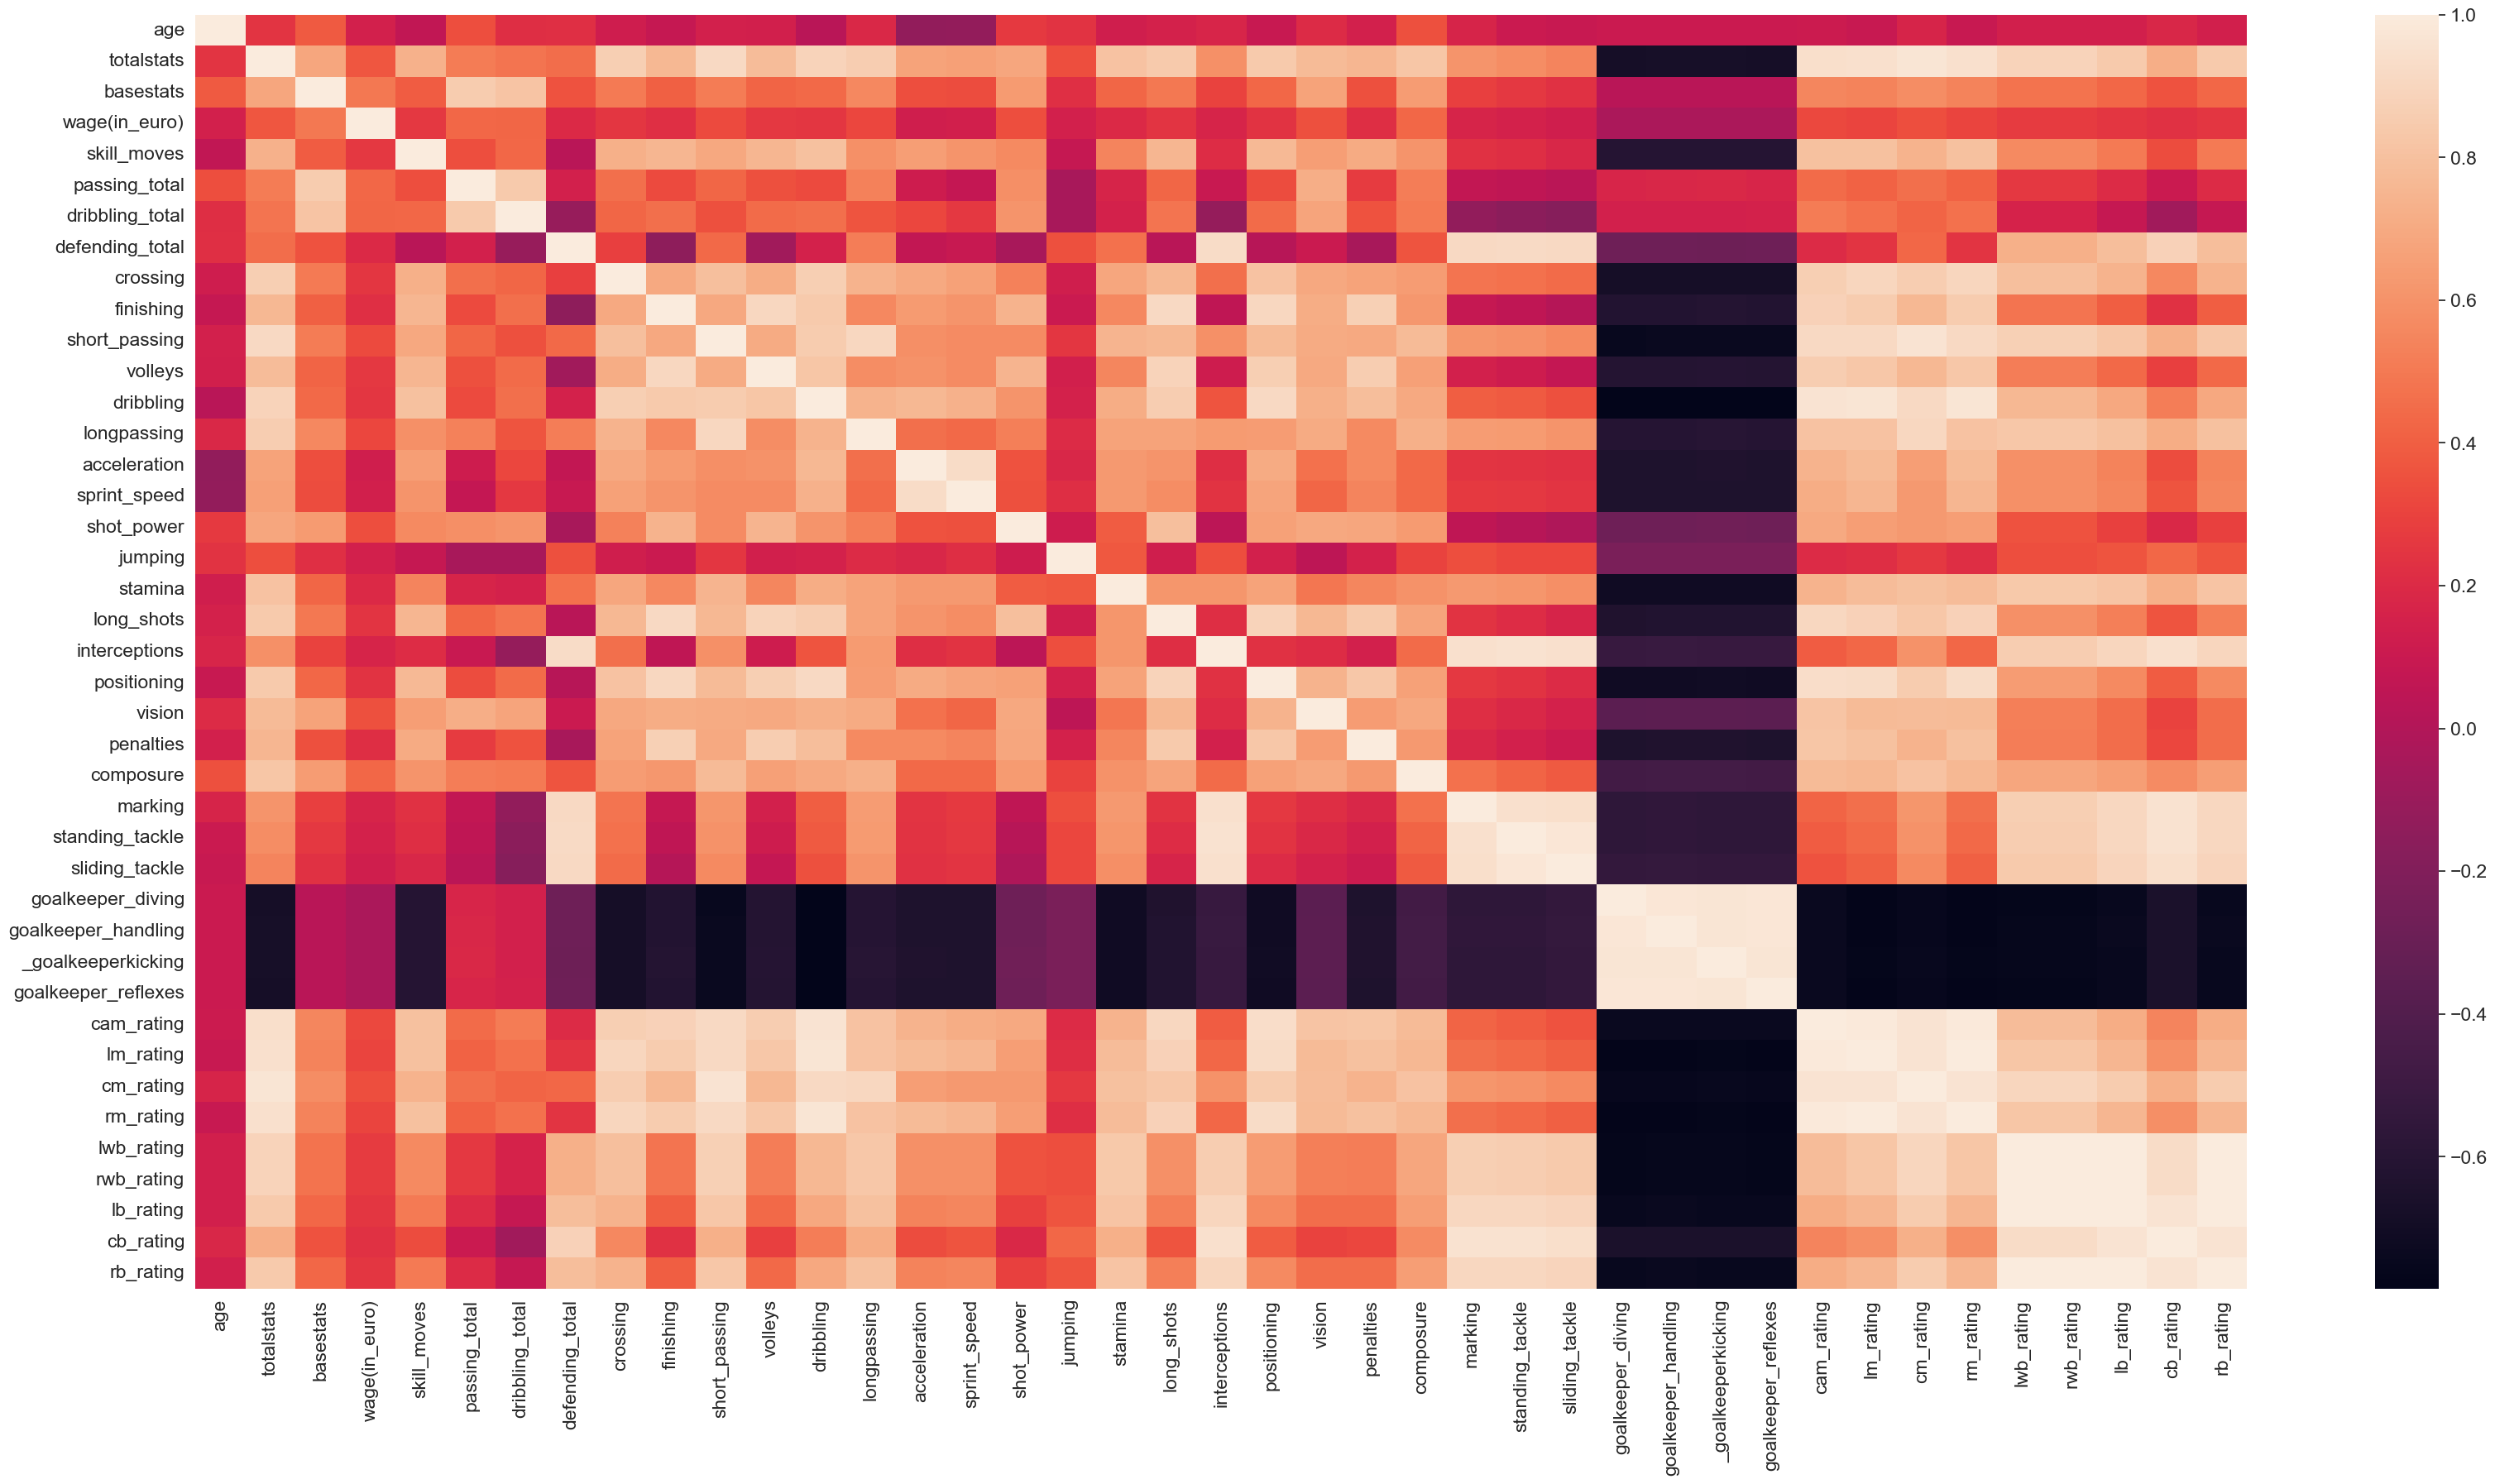

In [174]:
plt.figure(figsize=(40,20))
sns.heatmap(numerical_df_without_target.corr(), annot= False)

In [175]:
numerical_df_without_target

,age,totalstats,basestats,wage(in_euro),skill_moves,passing_total,dribbling_total,defending_total,crossing,finishing,short_passing,volleys,dribbling,longpassing,acceleration,sprint_speed,shot_power,jumping,stamina,long_shots,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,goalkeeper_diving,goalkeeper_handling,_goalkeeperkicking,goalkeeper_reflexes,cam_rating,lm_rating,cm_rating,rm_rating,lwb_rating,rwb_rating,lb_rating,cb_rating,rb_rating
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
89744e48-992e-11ed-bf73-c65beec292cc,35,2190,452,195000,4,90,94,34,84,90,91,88,95,90,87,76,86,68,70,91,40,93,94,75,96,20,35,24,6,11,15,8,91,91,88,91,67,67,62,53,62
89744e84-992e-11ed-bf73-c65beec292cc,34,2147,455,450000,4,83,87,39,75,92,89,88,87,76,79,80,87,79,82,80,39,92,89,84,90,43,24,18,13,11,5,7,91,89,84,89,67,67,63,58,63
89744e98-992e-11ed-bf73-c65beec292cc,33,2205,458,420000,4,79,86,44,71,94,84,89,85,70,76,75,91,85,76,84,49,94,81,90,88,35,42,19,15,6,12,10,88,86,83,86,67,67,64,63,64
89744ea2-992e-11ed-bf73-c65beec292cc,31,2303,483,350000,4,93,87,64,94,85,93,83,88,93,76,73,92,63,88,91,66,88,94,83,89,68,65,53,15,13,5,13,91,91,91,91,82,82,78,72,78
89744eac-992e-11ed-bf73-c65beec292cc,23,2177,470,230000,5,80,92,36,78,93,85,83,93,71,97,97,88,77,87,82,38,92,83,80,88,26,34,32,13,5,7,6,92,92,84,92,70,70,66,57,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8977396e-992e-11ed-bf73-c65beec292cc,21,1287,274,500,2,43,51,31,40,49,42,48,50,33,69,68,50,45,32,46,22,50,52,40,47,39,29,27,6,9,5,8,51,50,44,50,41,41,40,36,40
89773978-992e-11ed-bf73-c65beec292cc,17,1289,267,500,2,41,47,48,34,33,46,31,42,45,52,57,50,55,34,35,46,35,40,33,45,46,50,52,6,12,11,6,45,45,45,45,47,47,49,49,49
89773982-992e-11ed-bf73-c65beec292cc,18,1333,277,500,2,49,52,37,41,36,54,37,52,52,70,59,54,54,36,36,24,42,50,43,59,39,37,48,11,12,8,12,51,52,49,52,46,46,46,42,46


In [176]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer, MaxAbsScaler

# Initialize the scaler
scaler_1 = StandardScaler()
scaler_2 = MinMaxScaler()
scaler_3 = RobustScaler()
scaler_4 = Normalizer()
scaler_5 = MaxAbsScaler()

# Fit the scaler to the dataframe
scaler_1.fit(numerical_df_without_target)
scaler_2.fit(numerical_df_without_target)
scaler_3.fit(numerical_df_without_target)
scaler_4.fit(numerical_df_without_target)
scaler_5.fit(numerical_df_without_target)

# Transform the dataframe
numerical_df_scaled_1 = scaler_1.transform(numerical_df_without_target)
numerical_df_scaled_2 = scaler_2.transform(numerical_df_without_target)
numerical_df_scaled_3 = scaler_3.transform(numerical_df_without_target)
numerical_df_scaled_4 = scaler_4.transform(numerical_df_without_target)
numerical_df_scaled_5 = scaler_5.transform(numerical_df_without_target)


### Feature Engineering

FEATURES THAT I WANT TO EXPLORE
Focus in visualization
more combinations

Dream team, players characteristics, etc

compare with real life (transfer market, football manager)

In [177]:
categorical_df.drop(["positions_played", "club_position", "national_team_position"], axis=1)

,best_position,nationality,club_name,contract_until,on_loan,preferred_foot,national_team_name,attacking_work_rate,defensive_work_rate,zone_position
id,,,,,,,,,,
89744e48-992e-11ed-bf73-c65beec292cc,CAM,Argentina,Paris Saint-Germain,2023,-,Left,Argentina,Low,Low,M
89744e84-992e-11ed-bf73-c65beec292cc,CF,France,Real Madrid CF,2023,-,Right,France,Medium,Medium,A
89744e98-992e-11ed-bf73-c65beec292cc,ST,Poland,FC Barcelona,2025,-,Right,Poland,High,Medium,A
89744ea2-992e-11ed-bf73-c65beec292cc,CM,Belgium,Manchester City,2025,-,Right,Belgium,High,High,M
89744eac-992e-11ed-bf73-c65beec292cc,ST,France,Paris Saint-Germain,2024,-,Right,France,High,Low,A
...,...,...,...,...,...,...,...,...,...,...
8977396e-992e-11ed-bf73-c65beec292cc,CAM,Republic of Ireland,Sligo Rovers,2022,-,Right,-,Medium,Medium,M
89773978-992e-11ed-bf73-c65beec292cc,CDM,China PR,Guangzhou FC,2023,-,Right,-,Medium,Medium,M
89773982-992e-11ed-bf73-c65beec292cc,RM,Northern Ireland,Derry City,2023,-,Right,-,High,Medium,M


In [178]:
def change_to_value(year):
    if year == "-":
        return "WITHOUT"
    year = int(year)
    if year < 2025:
        return "SHORT"
    elif 2025 <= year <= 2028:
        return "MEDIUM"
    elif year > 2028:
        return "LONG"   

categorical_df["contract_length"] = categorical_df["contract_until"].apply(change_to_value)

In [179]:
categorical_df["contract_length"].unique()

array(['SHORT', 'MEDIUM', 'WITHOUT', 'LONG'], dtype=object)

In [180]:
categorical_df.drop(["contract_until", "positions_played", "club_position", "national_team_position"], inplace=True, axis=1)

In [181]:
categorical_df["best_position"].unique()

array(['CAM', 'CF', 'ST', 'CM', 'RW', 'GK', 'CB', 'LW', 'CDM', 'LM', 'LB',
       'RM', 'RB', 'LWB', 'RWB'], dtype=object)

In [182]:
categorical_df["nationality"].unique()

array(['Argentina', 'France', 'Poland', 'Belgium', 'Egypt', 'Germany',
       'Portugal', 'Netherlands', 'England', 'Brazil', 'Korea Republic',
       'Slovenia', 'Senegal', 'Norway', 'Italy', 'Costa Rica', 'Croatia',
       'Spain', 'Scotland', 'Austria', 'Algeria', 'Slovakia', 'Serbia',
       'Gabon', 'Czech Republic', 'Hungary', 'Switzerland', 'Uruguay',
       'Ghana', 'Morocco', 'Turkey', 'Montenegro', 'Cameroon',
       'Bosnia and Herzegovina', 'Colombia', 'Canada', "Côte d'Ivoire",
       'Nigeria', 'Denmark', 'Finland', 'Mexico', 'Ukraine',
       'United States', 'Sweden', 'Central African Republic', 'Mali',
       'Iran', 'Burkina Faso', 'Armenia', 'Wales', 'Greece', 'Guinea',
       'Japan', 'Jamaica', 'Kosovo', 'Chile', 'Ecuador', 'Libya',
       'Russia', 'Tunisia', 'Northern Ireland', 'Mozambique', 'Peru',
       'Togo', 'Romania', 'Congo DR', 'Angola', 'Albania', 'Georgia',
       'Zimbabwe', 'North Macedonia', 'Venezuela', 'Australia',
       'Paraguay', 'Republic of 

In [183]:
categorical_df["on_loan"].unique()

array(['-', 'TRUE'], dtype=object)

In [184]:
categorical_df["national_team_name"].unique()

array(['Argentina', 'France', 'Poland', 'Belgium', '-', 'Germany',
       'Portugal', 'Netherlands', 'England', 'Norway', 'Italy', 'Croatia',
       'Spain', 'Scotland', 'Austria', 'Czech Republic', 'Hungary',
       'Ghana', 'Morocco', 'Canada', 'Brazil', 'Denmark', 'Finland',
       'Ukraine', 'Mexico', 'United States', 'Sweden', 'Wales',
       'Northern Ireland', 'Australia', 'Republic of Ireland', 'Qatar',
       'New Zealand', 'Romania', 'China PR', 'Iceland'], dtype=object)

In [185]:
categorical_df["club_name"].value_counts()

Free agent                 92
Olympique de Marseille     35
Wolverhampton Wanderers    34
RC Celta de Vigo           34
Real Madrid CF             34
                           ..
Club Sol de América        19
Guaireña FC                19
Independiente Petrolero    19
Delfín Sporting Club       19
9 de Octubre               18
Name: club_name, Length: 679, dtype: int64

In [186]:
categorical_df["preferred_foot"].unique()

array(['Left', 'Right'], dtype=object)

In [187]:
categorical_df["attacking_work_rate"].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [188]:
categorical_df["defensive_work_rate"].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [189]:
	
categorical_df["zone_position"].unique()

array(['M', 'A', 'G', 'D'], dtype=object)

In [190]:

categorical_df["contract_length"].unique()

array(['SHORT', 'MEDIUM', 'WITHOUT', 'LONG'], dtype=object)

In [191]:
def change_to_value(on_loan):
    if on_loan == "-":
        return "NO"
    else:
        return "YES"   

categorical_df["on_loan"] = categorical_df["on_loan"].apply(change_to_value)

In [192]:
def change_to_value(club_name):
    if club_name == "Free agent":
        return "NO"
    else:
        return "YES"   

categorical_df["hired"] = categorical_df["club_name"].apply(change_to_value)

In [193]:
def change_to_value(national_team_name):
    if national_team_name == "-":
        return "NO"
    else:
        return "YES"   

categorical_df["on_national_squad"] = categorical_df["national_team_name"].apply(change_to_value)

In [194]:
categorical_df.head(5).T

id,89744e48-992e-11ed-bf73-c65beec292cc,89744e84-992e-11ed-bf73-c65beec292cc,89744e98-992e-11ed-bf73-c65beec292cc,89744ea2-992e-11ed-bf73-c65beec292cc,89744eac-992e-11ed-bf73-c65beec292cc
best_position,CAM,CF,ST,CM,ST
nationality,Argentina,France,Poland,Belgium,France
club_name,Paris Saint-Germain,Real Madrid CF,FC Barcelona,Manchester City,Paris Saint-Germain
on_loan,NO,NO,NO,NO,NO
preferred_foot,Left,Right,Right,Right,Right
national_team_name,Argentina,France,Poland,Belgium,France
attacking_work_rate,Low,Medium,High,High,High
defensive_work_rate,Low,Medium,Medium,High,Low
zone_position,M,A,A,M,A
contract_length,SHORT,SHORT,MEDIUM,MEDIUM,SHORT


In [195]:
categorical_df.drop(["nationality", "club_name", "national_team_name", "best_position"], inplace=True, axis=1)

## Categorical_df_cleaned

In [196]:
categorical_df

,on_loan,preferred_foot,attacking_work_rate,defensive_work_rate,zone_position,contract_length,hired,on_national_squad
id,,,,,,,,
89744e48-992e-11ed-bf73-c65beec292cc,NO,Left,Low,Low,M,SHORT,YES,YES
89744e84-992e-11ed-bf73-c65beec292cc,NO,Right,Medium,Medium,A,SHORT,YES,YES
89744e98-992e-11ed-bf73-c65beec292cc,NO,Right,High,Medium,A,MEDIUM,YES,YES
89744ea2-992e-11ed-bf73-c65beec292cc,NO,Right,High,High,M,MEDIUM,YES,YES
89744eac-992e-11ed-bf73-c65beec292cc,NO,Right,High,Low,A,SHORT,YES,YES
...,...,...,...,...,...,...,...,...
8977396e-992e-11ed-bf73-c65beec292cc,NO,Right,Medium,Medium,M,SHORT,YES,NO
89773978-992e-11ed-bf73-c65beec292cc,NO,Right,Medium,Medium,M,SHORT,YES,NO
89773982-992e-11ed-bf73-c65beec292cc,NO,Right,High,Medium,M,SHORT,YES,NO


In [197]:
categorical_df.columns

Index(['on_loan', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'zone_position', 'contract_length', 'hired',
       'on_national_squad'],
      dtype='object')

In [198]:
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18539 entries, 89744e48-992e-11ed-bf73-c65beec292cc to 8977398d-992e-11ed-bf73-c65beec292cc
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   on_loan              18539 non-null  object
 1   preferred_foot       18539 non-null  object
 2   attacking_work_rate  18539 non-null  object
 3   defensive_work_rate  18539 non-null  object
 4   zone_position        18539 non-null  object
 5   contract_length      18539 non-null  object
 6   hired                18539 non-null  object
 7   on_national_squad    18539 non-null  object
dtypes: object(8)
memory usage: 1.8+ MB


In [199]:
for col in categorical_df.columns:
    display(categorical_df[col].value_counts())

NO     17310
YES     1229
Name: on_loan, dtype: int64

Right    14045
Left      4494
Name: preferred_foot, dtype: int64

Medium    12204
High       5462
Low         873
Name: attacking_work_rate, dtype: int64

Medium    13613
High       3377
Low        1549
Name: defensive_work_rate, dtype: int64

M    7058
D    6273
A    3147
G    2061
Name: zone_position, dtype: int64

SHORT      13635
MEDIUM      4808
WITHOUT       92
LONG           4
Name: contract_length, dtype: int64

YES    18447
NO        92
Name: hired, dtype: int64

NO     17722
YES      817
Name: on_national_squad, dtype: int64

## categorical cleaned dummifies

In [200]:
encoder = OneHotEncoder(handle_unknown='ignore')
one_hot_encoder = OneHotEncoder(sparse=False)
categorical_df_encoded = one_hot_encoder.fit_transform(categorical_df)
categorical_df_encoded

array([[1., 0., 1., ..., 1., 0., 1.],
       [1., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 1., 0., 1.],
       ...,
       [1., 0., 0., ..., 1., 1., 0.],
       [1., 0., 0., ..., 1., 1., 0.],
       [1., 0., 1., ..., 1., 1., 0.]])

In [201]:
categorical_df_dummified = pd.get_dummies(categorical_df, prefix=categorical_df.columns, prefix_sep='_', drop_first=True)
categorical_df_dummified.head(5).T

id,89744e48-992e-11ed-bf73-c65beec292cc,89744e84-992e-11ed-bf73-c65beec292cc,89744e98-992e-11ed-bf73-c65beec292cc,89744ea2-992e-11ed-bf73-c65beec292cc,89744eac-992e-11ed-bf73-c65beec292cc
on_loan_YES,0,0,0,0,0
preferred_foot_Right,0,1,1,1,1
attacking_work_rate_Low,1,0,0,0,0
attacking_work_rate_Medium,0,1,0,0,0
defensive_work_rate_Low,1,0,0,0,1
defensive_work_rate_Medium,0,1,1,0,0
zone_position_D,0,0,0,0,0
zone_position_G,0,0,0,0,0
zone_position_M,1,0,0,1,0
contract_length_MEDIUM,0,0,1,1,0


## categorical_df_encoded and numerical_df_scaled

In [202]:
numerical_df_scaled_1 = pd.DataFrame(numerical_df_scaled_1, columns=numerical_df_without_target.columns)
numerical_df_scaled_2 = pd.DataFrame(numerical_df_scaled_2, columns=numerical_df_without_target.columns)
numerical_df_scaled_3 = pd.DataFrame(numerical_df_scaled_3, columns=numerical_df_without_target.columns)
numerical_df_scaled_4 = pd.DataFrame(numerical_df_scaled_4, columns=numerical_df_without_target.columns)
numerical_df_scaled_5 = pd.DataFrame(numerical_df_scaled_5, columns=numerical_df_without_target.columns)

## Merge

In [203]:
#combined_df = pd.concat([numerical_df_scaled, categorical_df_encoded], axis=1)

#combined_df = pd.merge(numerical_df_scaled, categorical_df_dummified, left_index=True, right_index=True)


In [204]:
#combined_df

In [205]:
combined_with_scaler1_df = pd.concat([categorical_df_dummified.reset_index(drop=True), numerical_df_scaled_1.reset_index(drop=True)], axis=1)
combined_with_scaler2_df = pd.concat([categorical_df_dummified.reset_index(drop=True), numerical_df_scaled_2.reset_index(drop=True)], axis=1)
combined_with_scaler3_df = pd.concat([categorical_df_dummified.reset_index(drop=True), numerical_df_scaled_3.reset_index(drop=True)], axis=1)
combined_with_scaler4_df = pd.concat([categorical_df_dummified.reset_index(drop=True), numerical_df_scaled_4.reset_index(drop=True)], axis=1)
combined_with_scaler5_df = pd.concat([categorical_df_dummified.reset_index(drop=True), numerical_df_scaled_5.reset_index(drop=True)], axis=1)

In [206]:
#combined_df = pd.concat([categorical_df_dummified, numerical_df_scaled], axis=1)

In [207]:
#combined_df = pd.merge(categorical_df_encoded, numerical_df_scaled, left_index=True, right_index=True)

In [208]:
#combined_df.head().T

In [209]:
y_test = y_test.astype(str)
y_pred = y_pred.astype(str)

## Preprocessing

In [210]:
X = combined_with_scaler1_df
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [211]:
print("Number of rows of X_train = {}".format(len(X_train)))
print("Number of rows of X_test = {}".format(len(X_test)))
print("Number of rows of y_train = {}".format(len(y_train)))
print("Number of rows of y_test = {}".format(len(y_test)))

Number of rows of X_train = 14831
Number of rows of X_test = 3708
Number of rows of y_train = 14831
Number of rows of y_test = 3708


## Models

### Linear Regression

In [212]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

In [213]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [214]:
print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("R-squared: ", r2)

Mean Absolute Error:  1801894.9395900755
Mean Squared Error:  14159805448962.14
R-squared:  0.713460146512663


## The following models require a categorical target variable


In [215]:
categorical_df.drop(["zone_position"], inplace=True, axis=1)
categorical_df_dummified = pd.get_dummies(categorical_df, prefix=categorical_df.columns, prefix_sep='_', drop_first=True)
combined_with_scaler1_df = pd.concat([categorical_df_dummified.reset_index(drop=True), numerical_df_scaled_1.reset_index(drop=True)], axis=1)
categorical_df_dummified.head(5).T


id,89744e48-992e-11ed-bf73-c65beec292cc,89744e84-992e-11ed-bf73-c65beec292cc,89744e98-992e-11ed-bf73-c65beec292cc,89744ea2-992e-11ed-bf73-c65beec292cc,89744eac-992e-11ed-bf73-c65beec292cc
on_loan_YES,0,0,0,0,0
preferred_foot_Right,0,1,1,1,1
attacking_work_rate_Low,1,0,0,0,0
attacking_work_rate_Medium,0,1,0,0,0
defensive_work_rate_Low,1,0,0,0,1
defensive_work_rate_Medium,0,1,1,0,0
contract_length_MEDIUM,0,0,1,1,0
contract_length_SHORT,1,1,0,0,1
contract_length_WITHOUT,0,0,0,0,0
hired_YES,1,1,1,1,1


In [216]:
X = combined_with_scaler1_df
y = target_cat
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


smote = SMOTE(random_state=0)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

smote_enn = SMOTEENN(random_state=0)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

tl = TomekLinks()
X_train_tomek, y_train_tomek = tl.fit_resample(X_train, y_train)

### Logistic Regression

In [238]:
# change target to categorical (no se puede con float o numeros solo categoricos)
model = LogisticRegression()
model.fit(X_train, y_train)

model_pred = model.predict(X_test)
model_pred_acc = model.score(X_test, y_test)

print(classification_report(y_test, y_pred))

print("Logistic Regression accuracy is: {:.2f}%".format(model_pred_acc*100))

              precision    recall  f1-score   support

           A       0.88      0.78      0.83       660
           D       0.93      0.91      0.92      1238
           G       1.00      1.00      1.00       451
           M       0.83      0.89      0.86      1359

    accuracy                           0.89      3708
   macro avg       0.91      0.89      0.90      3708
weighted avg       0.89      0.89      0.89      3708

Logistic Regression accuracy is: 91.32%


Balanced with Smote

In [239]:
model = LogisticRegression()
model.fit(X_train_sm, y_train_sm)

model_pred = model.predict(X_test)
model_pred_acc = model.score(X_test, y_test)

print(classification_report(y_test, y_pred))

print("Logistic Regression accuracy is: {:.2f}%".format(model_pred_acc*100))


              precision    recall  f1-score   support

           A       0.88      0.78      0.83       660
           D       0.93      0.91      0.92      1238
           G       1.00      1.00      1.00       451
           M       0.83      0.89      0.86      1359

    accuracy                           0.89      3708
   macro avg       0.91      0.89      0.90      3708
weighted avg       0.89      0.89      0.89      3708

Logistic Regression accuracy is: 91.18%


Balanced with SMOTEENN

In [240]:
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)
model_pred = model.predict(X_test)
model_pred_acc = model.score(X_test, y_test)

print(classification_report(y_test, y_pred))

print("Logistic Regression accuracy is: {:.2f}%".format(model_pred_acc*100))


              precision    recall  f1-score   support

           A       0.88      0.78      0.83       660
           D       0.93      0.91      0.92      1238
           G       1.00      1.00      1.00       451
           M       0.83      0.89      0.86      1359

    accuracy                           0.89      3708
   macro avg       0.91      0.89      0.90      3708
weighted avg       0.89      0.89      0.89      3708

Logistic Regression accuracy is: 89.48%


Balanced with Tomeklinks

In [241]:
model = LogisticRegression()
model.fit(X_train_tomek, y_train_tomek)
model_pred = model.predict(X_test)
model_pred_acc = model.score(X_test, y_test)

print(classification_report(y_test, y_pred))

print("Logistic Regression accuracy is: {:.2f}%".format(model_pred_acc*100))

              precision    recall  f1-score   support

           A       0.88      0.78      0.83       660
           D       0.93      0.91      0.92      1238
           G       1.00      1.00      1.00       451
           M       0.83      0.89      0.86      1359

    accuracy                           0.89      3708
   macro avg       0.91      0.89      0.90      3708
weighted avg       0.89      0.89      0.89      3708

Logistic Regression accuracy is: 91.29%


### k-Nearest Neighbors

In [242]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred_acc = knn.score(X_test, y_test)

print(classification_report(y_test, y_pred))

print("k-Nearest Neighbors Accuracy is: {:.2f}%".format(y_pred_acc*100))



              precision    recall  f1-score   support

           A       0.87      0.77      0.82       660
           D       0.92      0.91      0.92      1238
           G       1.00      1.00      1.00       451
           M       0.82      0.88      0.85      1359

    accuracy                           0.89      3708
   macro avg       0.90      0.89      0.90      3708
weighted avg       0.89      0.89      0.88      3708

k-Nearest Neighbors Accuracy is: 88.51%


Balanced with Smote

In [244]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_sm, y_train_sm)
y_pred = knn.predict(X_test)
y_pred_acc = knn.score(X_test, y_test)


print(classification_report(y_test, y_pred))

print("k-Nearest Neighbors Accuracy is: {:.2f}%".format(y_pred_acc*100))


              precision    recall  f1-score   support

           A       0.74      0.87      0.80       660
           D       0.91      0.92      0.92      1238
           G       1.00      1.00      1.00       451
           M       0.86      0.78      0.81      1359

    accuracy                           0.87      3708
   macro avg       0.88      0.89      0.88      3708
weighted avg       0.87      0.87      0.87      3708

k-Nearest Neighbors Accuracy is: 86.89%


Balanced with SMOTEENN

In [245]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_resampled, y_train_resampled)
y_pred = knn.predict(X_test)
y_pred_acc = knn.score(X_test, y_test)

print(classification_report(y_test, y_pred))

print("k-Nearest Neighbors Accuracy is: {:.2f}%".format(y_pred_acc*100))


              precision    recall  f1-score   support

           A       0.68      0.92      0.78       660
           D       0.91      0.92      0.92      1238
           G       1.00      1.00      1.00       451
           M       0.87      0.71      0.78      1359

    accuracy                           0.85      3708
   macro avg       0.87      0.89      0.87      3708
weighted avg       0.87      0.85      0.85      3708

k-Nearest Neighbors Accuracy is: 85.36%


Balanced with Tomeklinks

In [246]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_tomek, y_train_tomek)
y_pred = knn.predict(X_test)
y_pred_acc = knn.score(X_test, y_test)

print(classification_report(y_test, y_pred))

print("k-Nearest Neighbors Accuracy is: {:.2f}%".format(y_pred_acc*100))


              precision    recall  f1-score   support

           A       0.88      0.78      0.83       660
           D       0.93      0.91      0.92      1238
           G       1.00      1.00      1.00       451
           M       0.83      0.89      0.86      1359

    accuracy                           0.89      3708
   macro avg       0.91      0.89      0.90      3708
weighted avg       0.89      0.89      0.89      3708

k-Nearest Neighbors Accuracy is: 88.97%


### Random Forest

In [247]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_pred_acc = rf.score(X_test, y_test)

print(classification_report(y_test, y_pred))

print("Random Forest Accuracy: {:.2f}%".format(rf_pred_acc*100))


              precision    recall  f1-score   support

           A       0.88      0.78      0.83       660
           D       0.93      0.91      0.92      1238
           G       1.00      1.00      1.00       451
           M       0.83      0.89      0.86      1359

    accuracy                           0.89      3708
   macro avg       0.91      0.89      0.90      3708
weighted avg       0.89      0.89      0.89      3708

Random Forest Accuracy: 91.24%


Balanced with Smote

In [248]:

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train_sm, y_train_sm)
rf_acc = rf.score(X_test, y_test)

print(classification_report(y_test, y_pred))
print("Random Forest Accuracy: {:.2f}%".format(rf_acc*100))

              precision    recall  f1-score   support

           A       0.88      0.78      0.83       660
           D       0.93      0.91      0.92      1238
           G       1.00      1.00      1.00       451
           M       0.83      0.89      0.86      1359

    accuracy                           0.89      3708
   macro avg       0.91      0.89      0.90      3708
weighted avg       0.89      0.89      0.89      3708

Random Forest Accuracy: 91.26%


Balanced with SMOTEENN

In [249]:
# Train a random forest
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train_resampled, y_train_resampled)
rf_acc = rf.score(X_test, y_test)

print(classification_report(y_test, y_pred))
print("Random Forest Accuracy: {:.2f}%".format(rf_acc*100))

              precision    recall  f1-score   support

           A       0.88      0.78      0.83       660
           D       0.93      0.91      0.92      1238
           G       1.00      1.00      1.00       451
           M       0.83      0.89      0.86      1359

    accuracy                           0.89      3708
   macro avg       0.91      0.89      0.90      3708
weighted avg       0.89      0.89      0.89      3708

Random Forest Accuracy: 88.97%


Balanced with Tomeklinks

In [250]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train_tomek, y_train_tomek)
rf_acc = rf.score(X_test, y_test)

print(classification_report(y_test, y_pred))
print("Random Forest Accuracy: {:.2f}%".format(rf_acc*100))

              precision    recall  f1-score   support

           A       0.88      0.78      0.83       660
           D       0.93      0.91      0.92      1238
           G       1.00      1.00      1.00       451
           M       0.83      0.89      0.86      1359

    accuracy                           0.89      3708
   macro avg       0.91      0.89      0.90      3708
weighted avg       0.89      0.89      0.89      3708

Random Forest Accuracy: 90.97%


### Decision Trees



In [251]:
# Train a decision tree
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
dt_acc = dt.score(X_test, y_test)

print(classification_report(y_test, y_pred))
print("Decision Tree Accuracy: {:.2f}%".format(dt_acc*100))


              precision    recall  f1-score   support

           A       0.88      0.78      0.83       660
           D       0.93      0.91      0.92      1238
           G       1.00      1.00      1.00       451
           M       0.83      0.89      0.86      1359

    accuracy                           0.89      3708
   macro avg       0.91      0.89      0.90      3708
weighted avg       0.89      0.89      0.89      3708

Decision Tree Accuracy: 84.57%


Balanced with Smote

In [252]:
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train_sm, y_train_sm)
dt_acc = dt.score(X_test, y_test)

print(classification_report(y_test, y_pred))
print("Decision Tree Accuracy: {:.2f}%".format(dt_acc*100))

              precision    recall  f1-score   support

           A       0.88      0.78      0.83       660
           D       0.93      0.91      0.92      1238
           G       1.00      1.00      1.00       451
           M       0.83      0.89      0.86      1359

    accuracy                           0.89      3708
   macro avg       0.91      0.89      0.90      3708
weighted avg       0.89      0.89      0.89      3708

Decision Tree Accuracy: 85.41%


Balanced with SMOTEENN

In [253]:
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train_resampled, y_train_resampled)
dt_acc = dt.score(X_test, y_test)


print(classification_report(y_test, y_pred))
print("Decision Tree Accuracy: {:.2f}%".format(dt_acc*100))

              precision    recall  f1-score   support

           A       0.88      0.78      0.83       660
           D       0.93      0.91      0.92      1238
           G       1.00      1.00      1.00       451
           M       0.83      0.89      0.86      1359

    accuracy                           0.89      3708
   macro avg       0.91      0.89      0.90      3708
weighted avg       0.89      0.89      0.89      3708

Decision Tree Accuracy: 85.25%


Balanced with Tomek

In [254]:
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train_tomek, y_train_tomek)
dt_acc = dt.score(X_test, y_test)

print(classification_report(y_test, y_pred))
print("Decision Tree Accuracy: {:.2f}%".format(dt_acc*100))

              precision    recall  f1-score   support

           A       0.88      0.78      0.83       660
           D       0.93      0.91      0.92      1238
           G       1.00      1.00      1.00       451
           M       0.83      0.89      0.86      1359

    accuracy                           0.89      3708
   macro avg       0.91      0.89      0.90      3708
weighted avg       0.89      0.89      0.89      3708

Decision Tree Accuracy: 85.30%


In [255]:
from sklearn.metrics import confusion_matrix

In [256]:
print(confusion_matrix(y_test, y_pred))

[[ 512    3    0  145]
 [   1 1127    0  110]
 [   0    0  451    0]
 [  66   84    0 1209]]


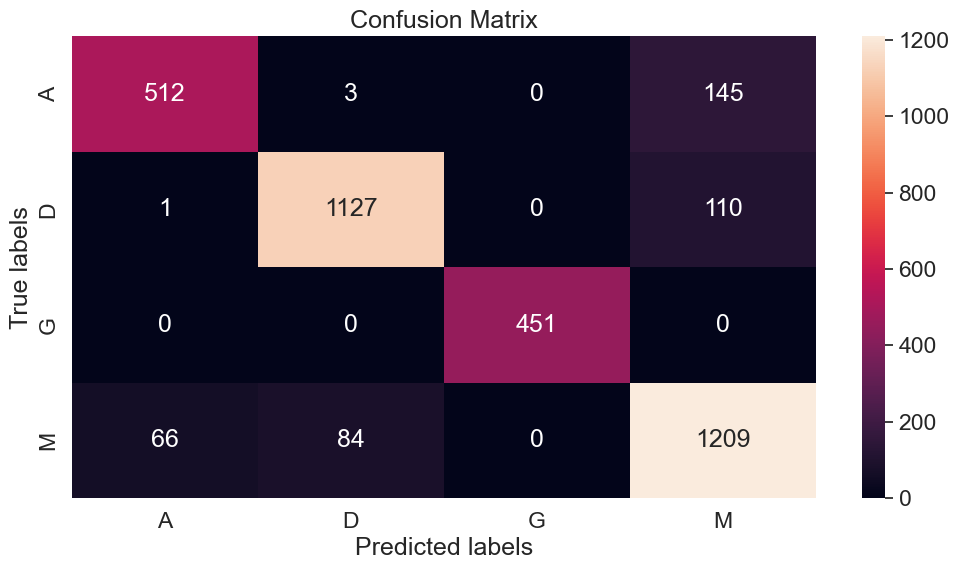

In [257]:
plt.figure(figsize=(12,6))
cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(["A", "D", "G", "M"]); ax.yaxis.set_ticklabels(["A", "D", "G", "M"]);